## ML Project - EXPLORING HOUSE PRICE DYNAMICS 

The project is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

# 1. Data Understanding and Exploration


In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('train.csv',)

In [3]:
# Looking at the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Summary of the dataset : 1460 rows, 81 columns
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# checking for null values
df_null_count = df.isna().sum().reset_index()

In [7]:
df_null_count.columns = ['Variable','Null_Count']

In [8]:
df_null_count.head()

,Variable,Null_Count
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0


# 2. Data cleaning

### Treating Null Values

In [9]:
# checking for percentage of null values
df_null_count['Null_Percentage'] = round((df_null_count['Null_Count']/df.shape[0])*100,2)

In [10]:
#  displaying null values greater than 75
df_null_count[df_null_count['Null_Percentage']>=75]

,Variable,Null_Count,Null_Percentage
6,Alley,1369,93.77
72,PoolQC,1453,99.52
73,Fence,1179,80.75
74,MiscFeature,1406,96.30


In [11]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [12]:
#  displaying null values greater than 50 and less than 75
df_null_count[(df_null_count['Null_Percentage']>=50) & (df_null_count['Null_Percentage']<75)]

,Variable,Null_Count,Null_Percentage


In [13]:
#  displaying null values greater than 20 and less than 50
df_null_count[(df_null_count['Null_Percentage']>=20) & (df_null_count['Null_Percentage']<50)]

,Variable,Null_Count,Null_Percentage
57,FireplaceQu,690,47.26


In [14]:
#  displaying null values less than 20
df_null_count[(df_null_count['Null_Percentage']>0) & (df_null_count['Null_Percentage']<20)]

,Variable,Null_Count,Null_Percentage
3,LotFrontage,259,17.74
25,MasVnrType,8,0.55
26,MasVnrArea,8,0.55
30,BsmtQual,37,2.53
31,BsmtCond,37,2.53
32,BsmtExposure,38,2.60
33,BsmtFinType1,37,2.53
35,BsmtFinType2,38,2.60
42,Electrical,1,0.07
58,GarageType,81,5.55


In [15]:
df.shape

(1460, 81)

## Dropping few variables by looking into their dtype and their fill rate - 

In [16]:
# storing these values
null_75 = df_null_count[df_null_count['Null_Percentage']>=75]
null_50_75 = df_null_count[(df_null_count['Null_Percentage']>=50) & (df_null_count['Null_Percentage']<75)]
null_20_50 = df_null_count[(df_null_count['Null_Percentage']>=20) & (df_null_count['Null_Percentage']<50)]
null_0_20 = df_null_count[(df_null_count['Null_Percentage']>0) & (df_null_count['Null_Percentage']<20)]

In [17]:
df[null_75['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        91 non-null     object
 1   PoolQC       7 non-null      object
 2   Fence        281 non-null    object
 3   MiscFeature  54 non-null     object
dtypes: object(4)
memory usage: 45.8+ KB


In [18]:
df[null_50_75['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

In [19]:
df[null_20_50['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


In [20]:
df[null_0_20['Variable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [21]:
df['MasVnrType'].value_counts(normalize = True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [22]:
df['FireplaceQu'].value_counts(normalize = True)

Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64

In [23]:
# droppping variables having null percentage greater than 20
df.drop(null_75['Variable'],axis = 1,inplace = True)

In [24]:
df.shape

(1460, 77)

In [25]:
df.drop(null_50_75['Variable'],axis = 1,inplace = True)

In [26]:
df.drop(null_20_50['Variable'],axis = 1,inplace = True)

In [27]:
df_null_count = df.isna().sum().reset_index()

In [28]:
df_null_count.columns = ['Variable','Null_Count']

In [29]:
df.drop('MasVnrType',axis=1,inplace=True)

## Final Shape of data after removing null values

In [30]:
df.shape

(1460, 75)

In [31]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [32]:
# dropping rows having null values
df.dropna(inplace = True)

In [33]:
df.shape

(1094, 75)

In [34]:
# checking for percentage of records left
a = 1094/1460

In [35]:
## after removing null values - we are left with  ~75% records
a*100

74.93150684931507

In [36]:
# seperating numerical and categorical columns
num_cols = list(df.select_dtypes(include= ['int','float']).columns)

In [37]:
cat_cols = list(df.select_dtypes(include = ['object']).columns)

In [38]:
# checking length of categorical columns
len(cat_cols)

37

# 3.Data preparation

## Univariate Analysis

In [39]:
# making a dictionary having columns of df as keys and unique values in those columns as values for these keys 
unique_count_dict = {}
for i in cat_cols:
    a = df[i].nunique()
    unique_count_dict[i] = a

In [40]:
unique_count_dict

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 6,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 5,
 'RoofMatl': 7,
 'Exterior1st': 14,
 'Exterior2nd': 16,
 'ExterQual': 4,
 'ExterCond': 4,
 'Foundation': 5,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 4,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 6,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [41]:
# creating a dictionary storing unique values(of columns) less than 15 
unique_count_dict_limit = {}

for i in cat_cols:
    if unique_count_dict[i]<=15:
        unique_count_dict_limit[i] = unique_count_dict[i]

In [42]:
unique_count_dict_limit

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Condition1': 9,
 'Condition2': 6,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 5,
 'RoofMatl': 7,
 'Exterior1st': 14,
 'ExterQual': 4,
 'ExterCond': 4,
 'Foundation': 5,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 4,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 6,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [43]:
# checking how many columns are left having uniques values less than 15 
len(unique_count_dict_limit)

35

In [44]:
# checking length of numerical columns
len(num_cols)

38

In [45]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [46]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1094.0,727.375686,420.955488,1.0,366.50,723.5,1093.75,1460.0
MSSubClass,1094.0,56.128885,41.976345,20.0,20.00,50.0,70.00,190.0
LotFrontage,1094.0,70.759598,24.508859,21.0,60.00,70.0,80.00,313.0
LotArea,1094.0,10132.346435,8212.249621,1300.0,7606.75,9444.5,11387.25,215245.0
OverallQual,1094.0,6.247715,1.366797,2.0,5.00,6.0,7.00,10.0
OverallCond,1094.0,5.575868,1.066500,2.0,5.00,5.0,6.00,9.0
YearBuilt,1094.0,1972.412249,31.189752,1880.0,1953.00,1975.0,2003.00,2010.0
YearRemodAdd,1094.0,1985.915905,20.930772,1950.0,1967.00,1995.0,2005.00,2010.0
MasVnrArea,1094.0,109.855576,190.667459,0.0,0.00,0.0,171.75,1600.0
BsmtFinSF1,1094.0,448.191956,468.728095,0.0,0.00,384.5,712.75,5644.0


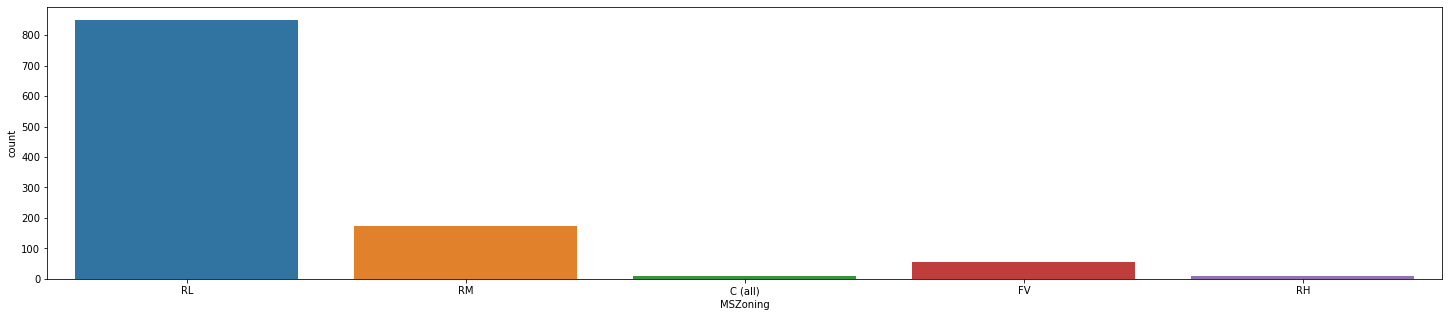

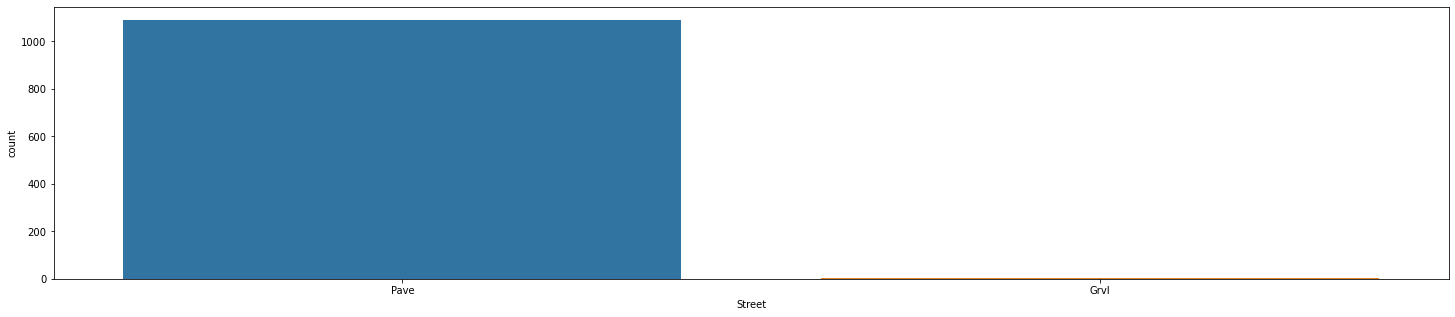

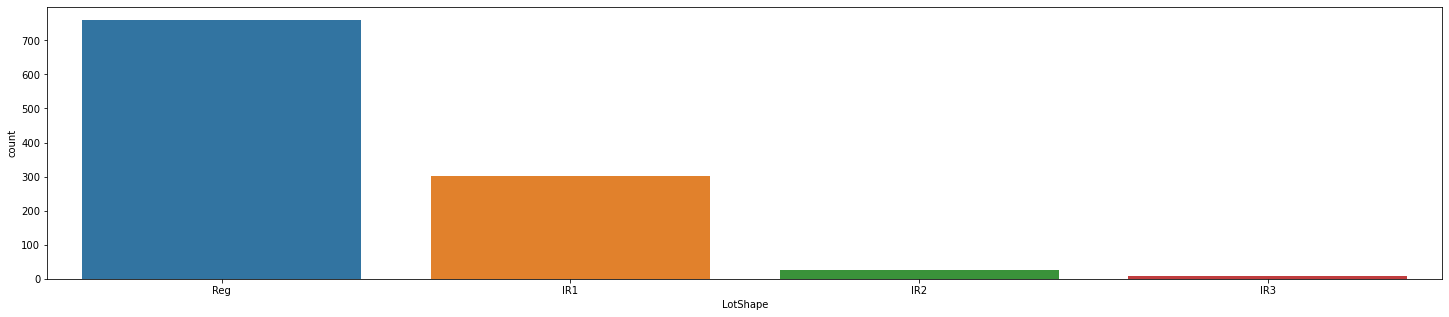

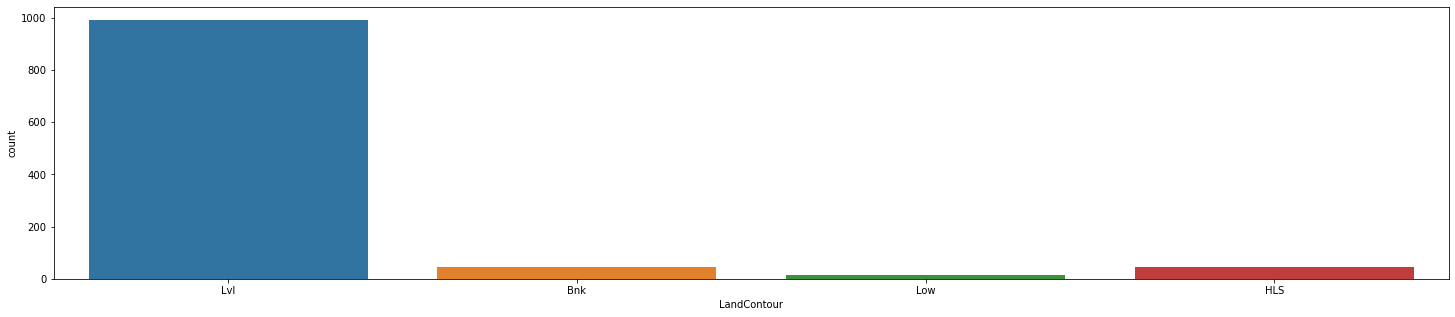

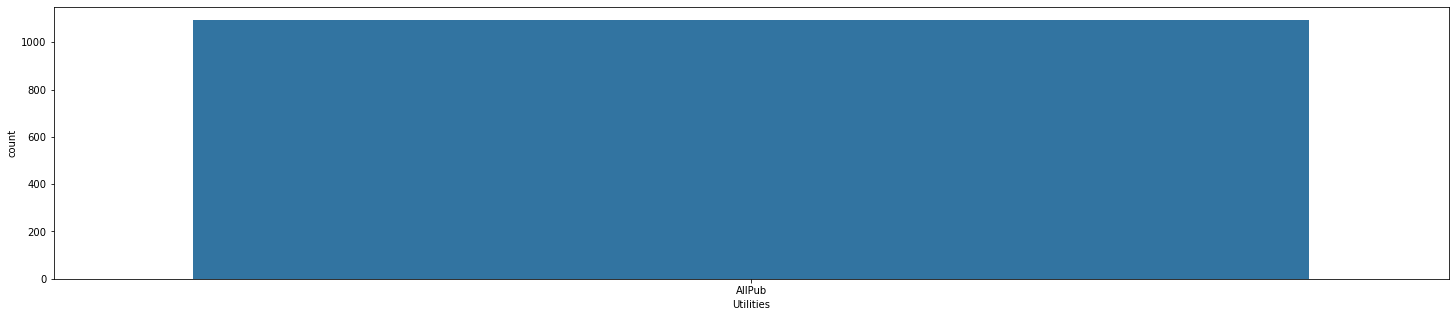

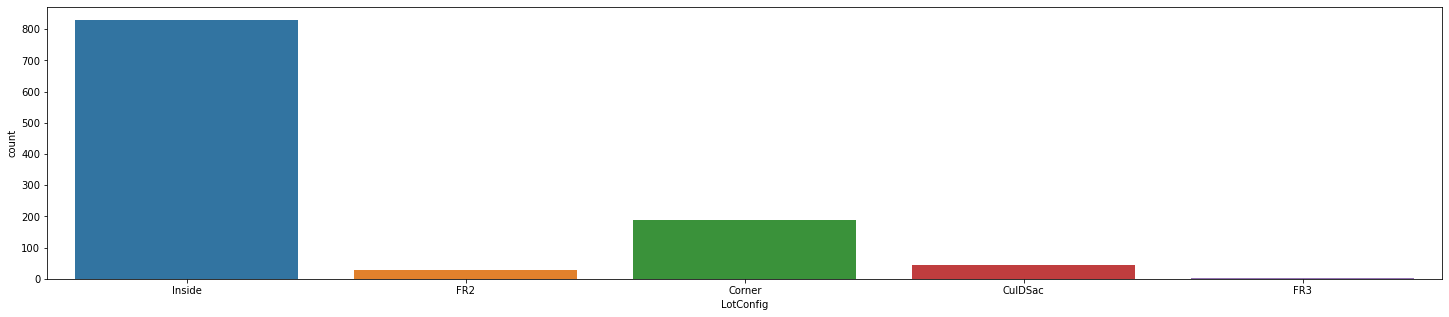

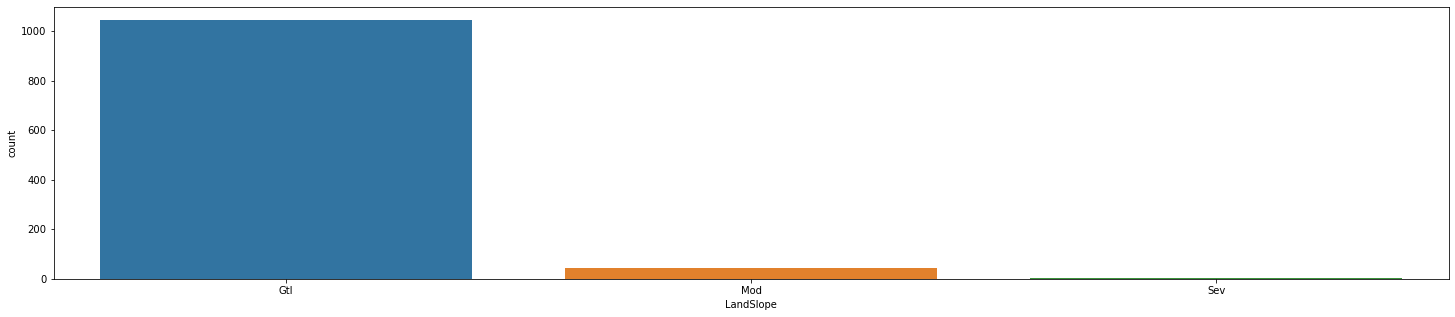

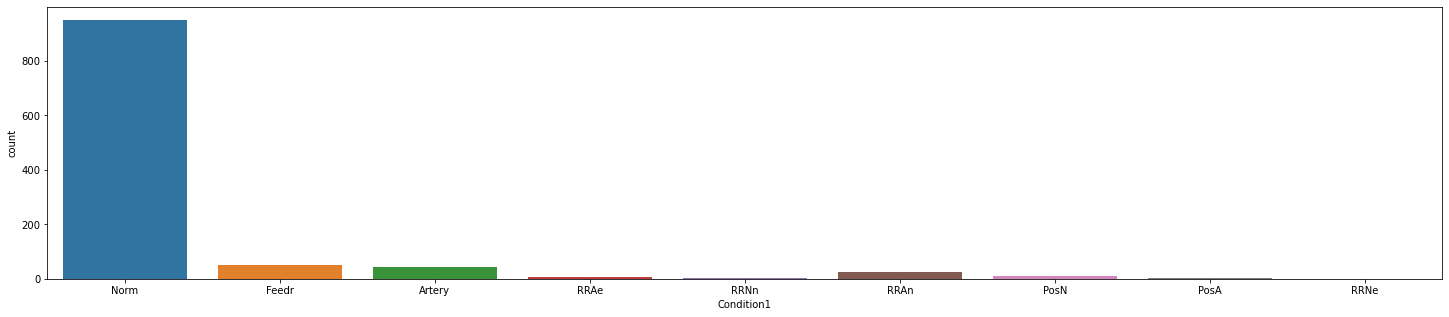

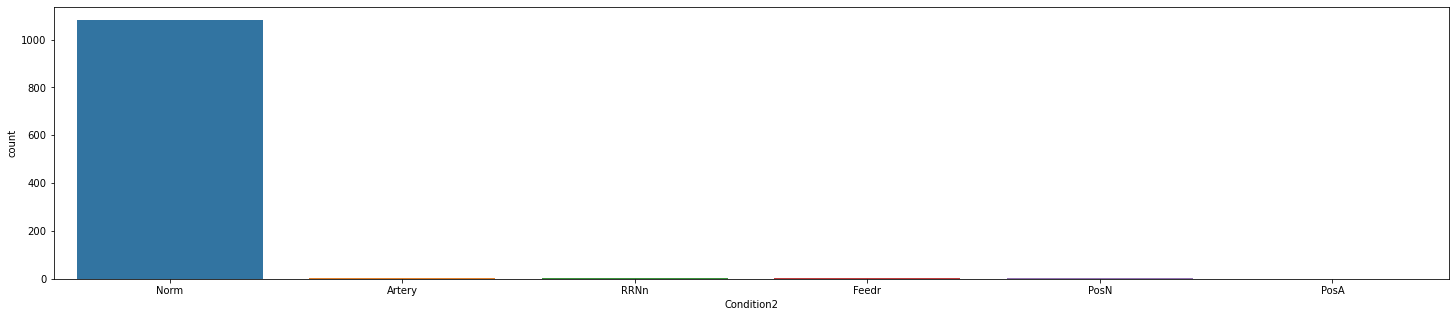

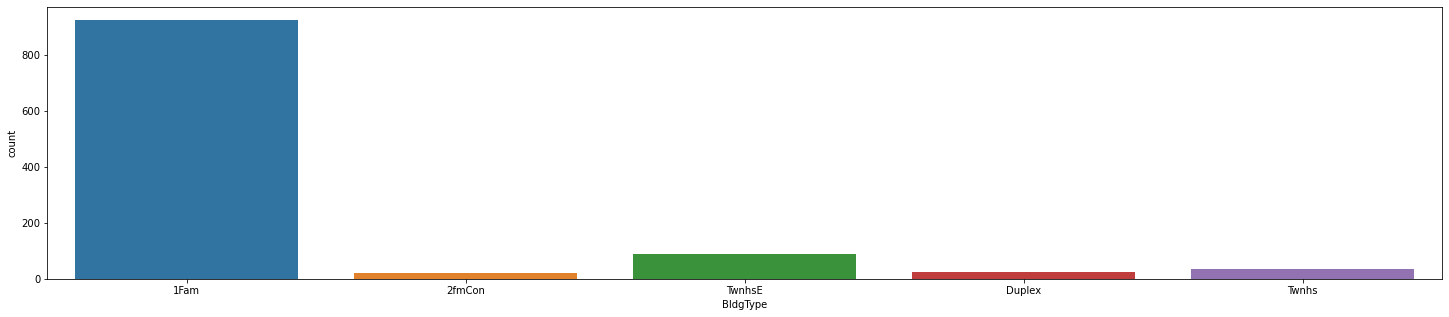

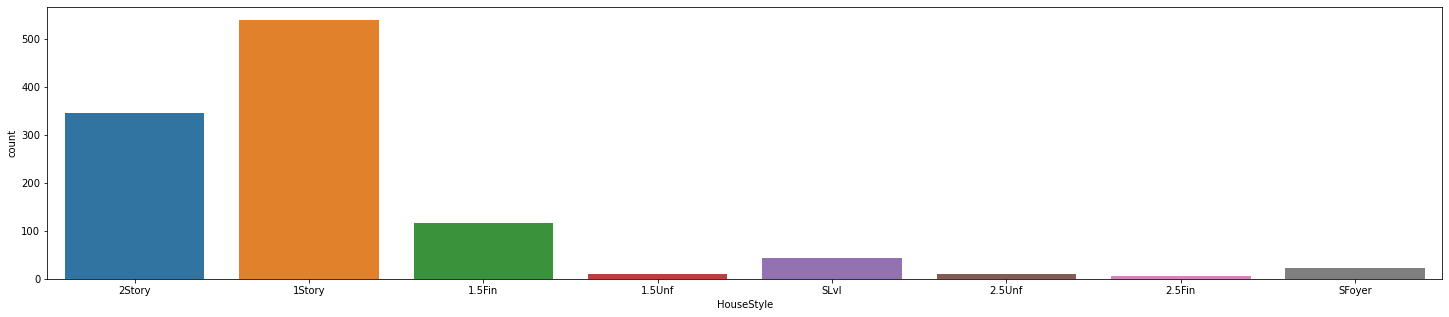

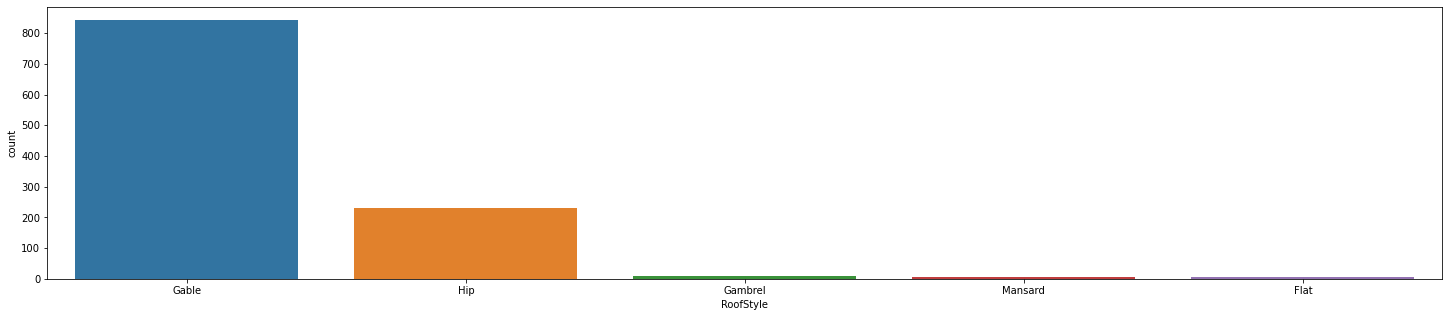

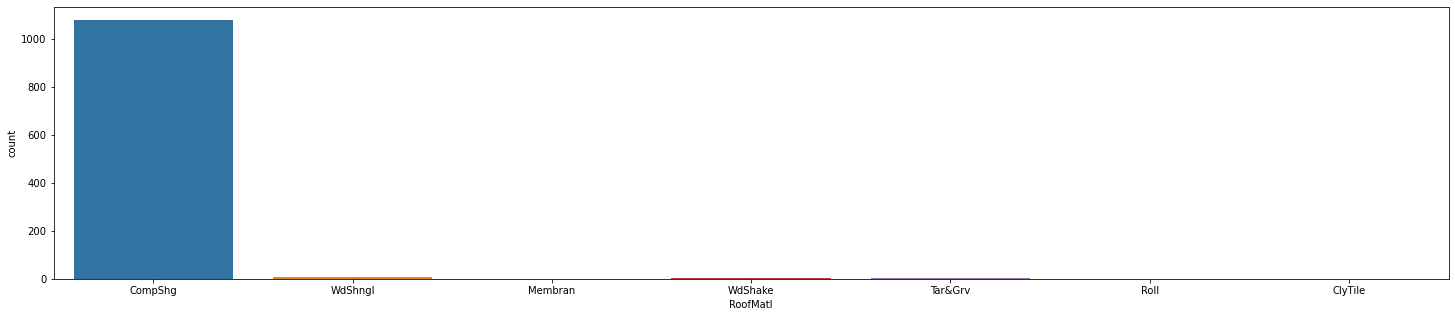

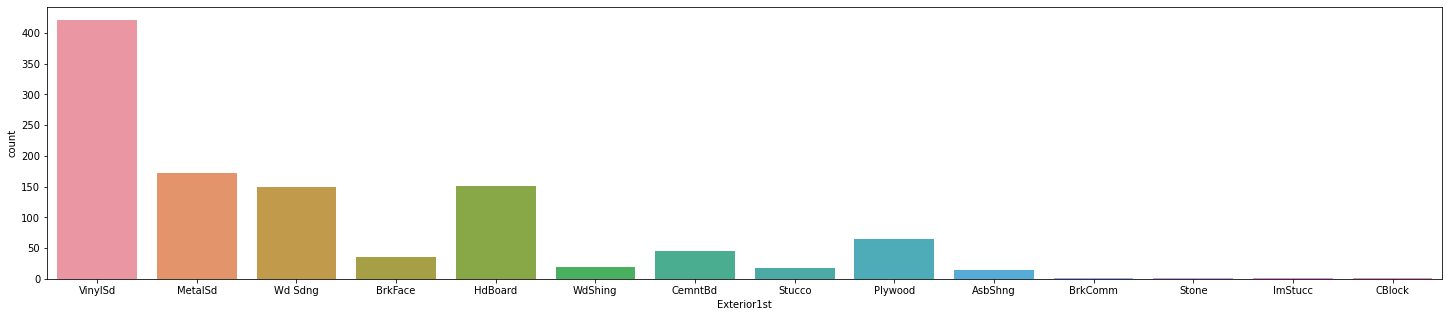

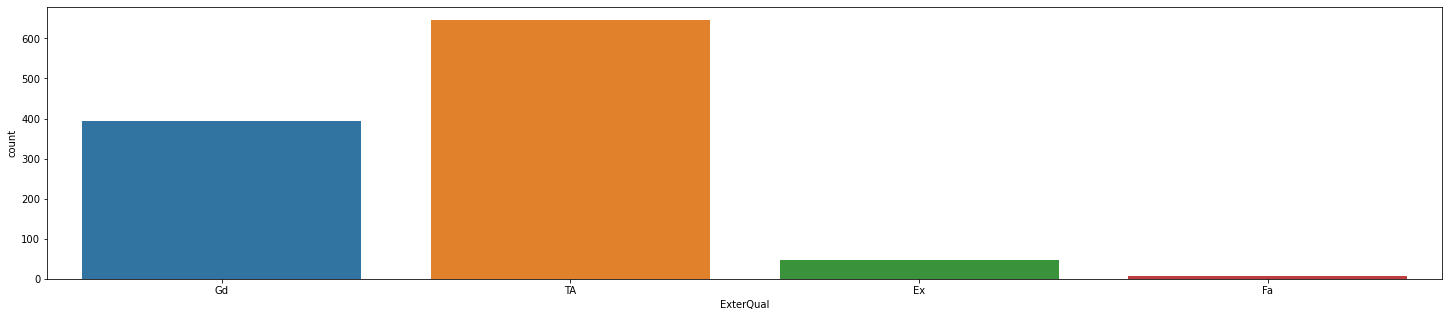

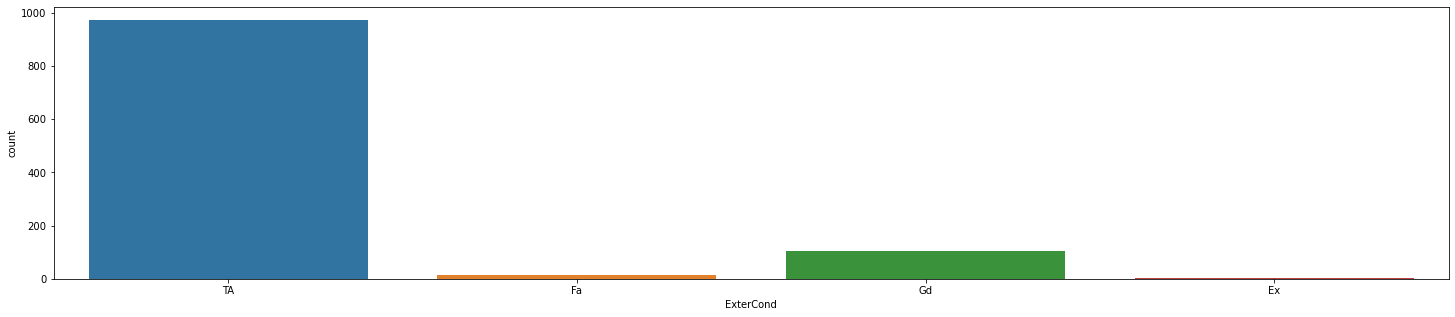

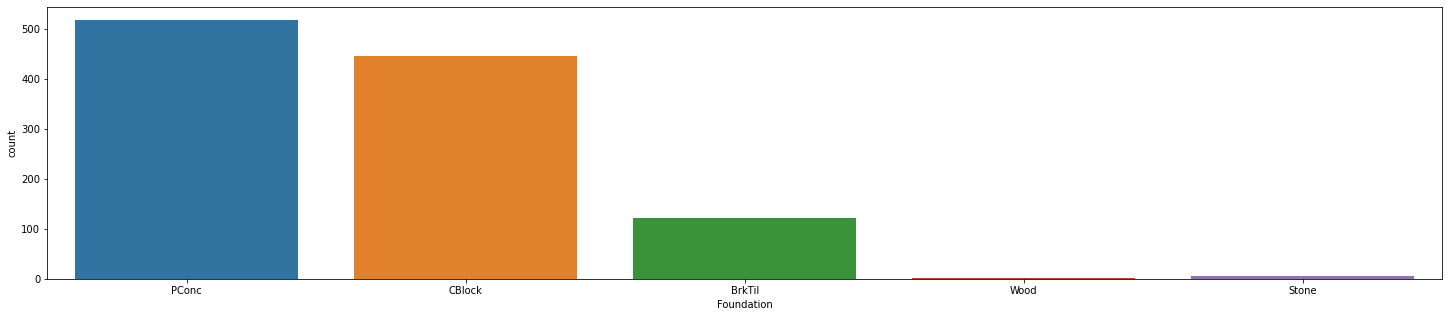

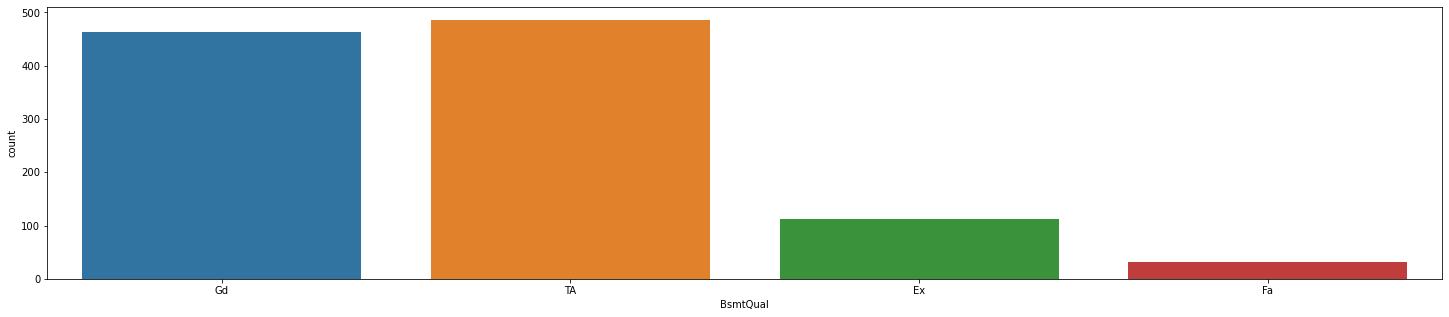

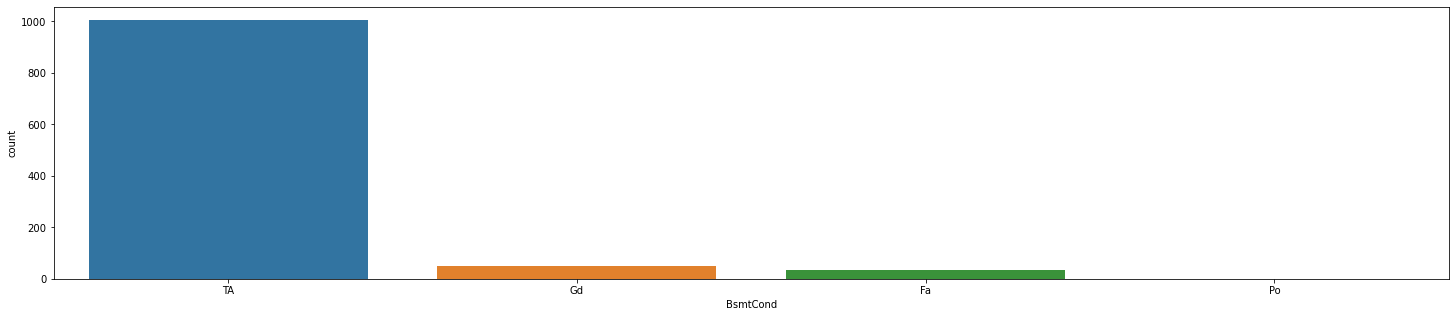

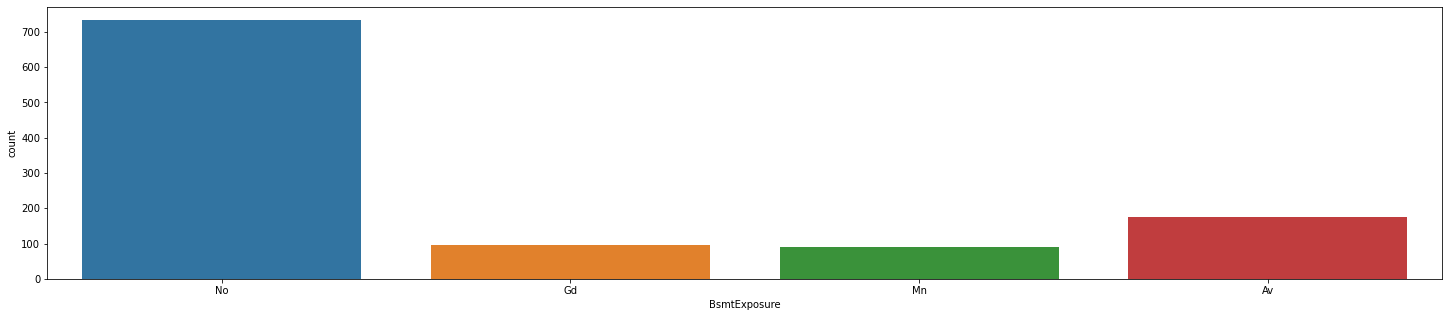

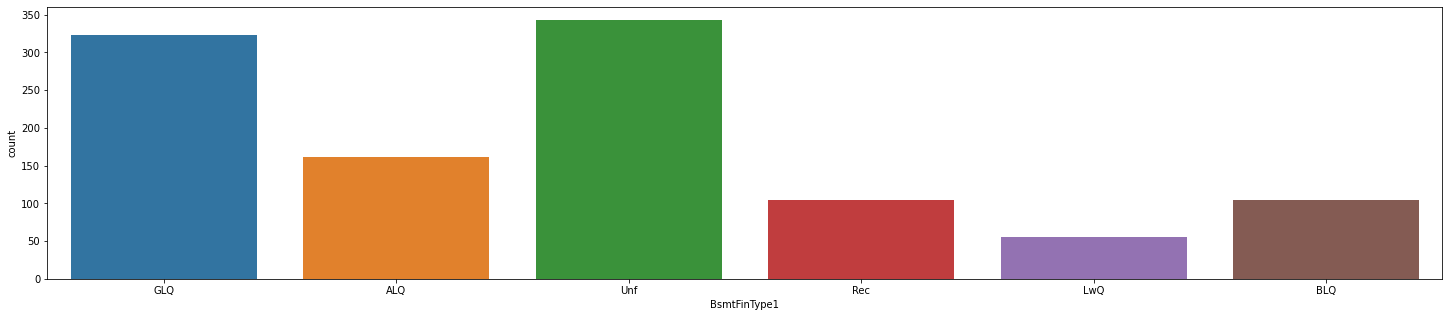

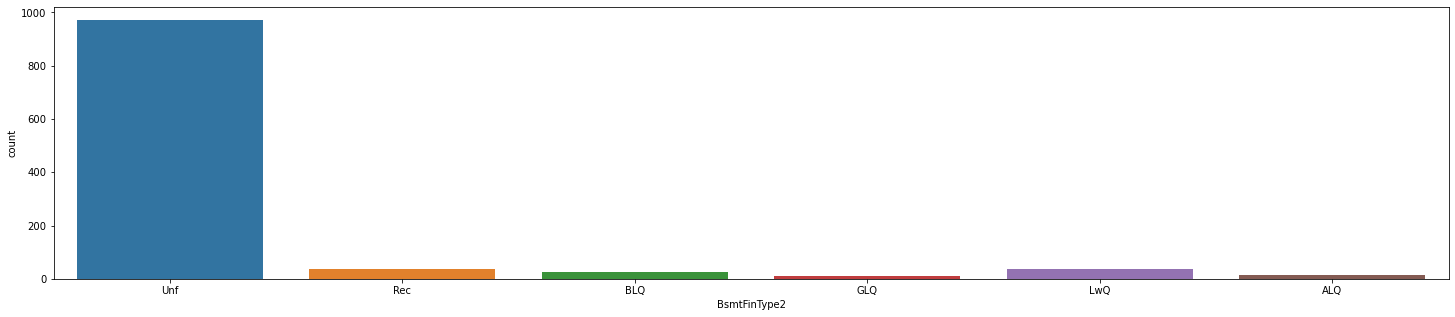

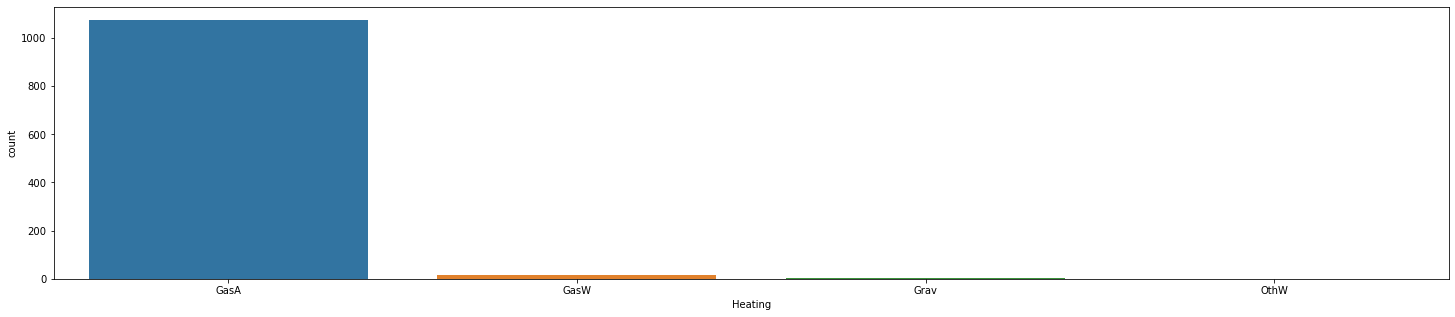

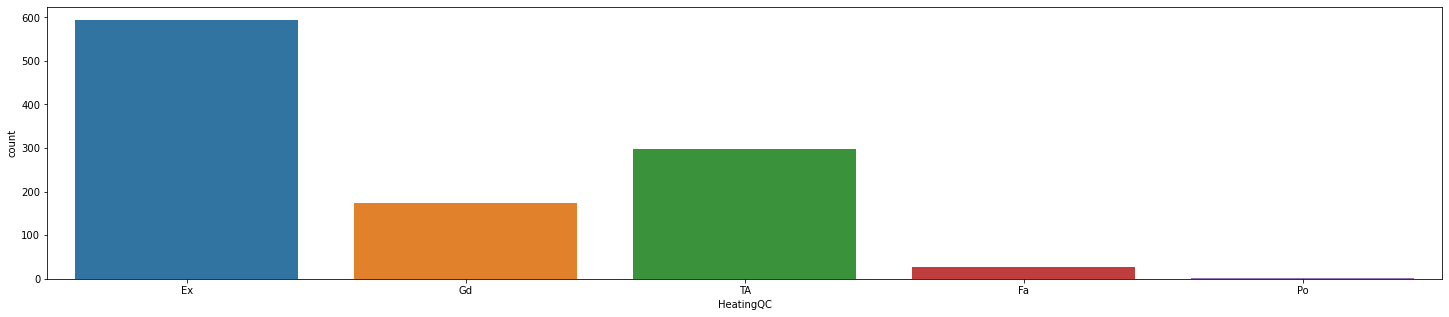

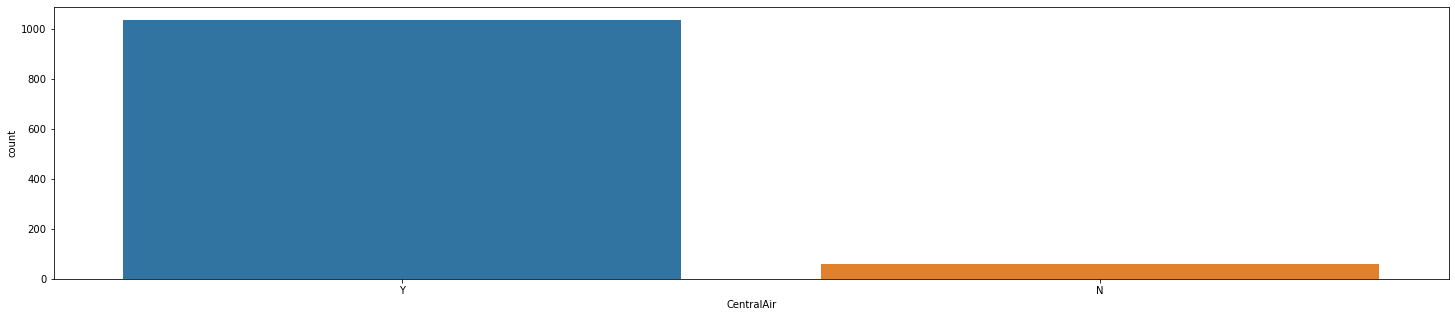

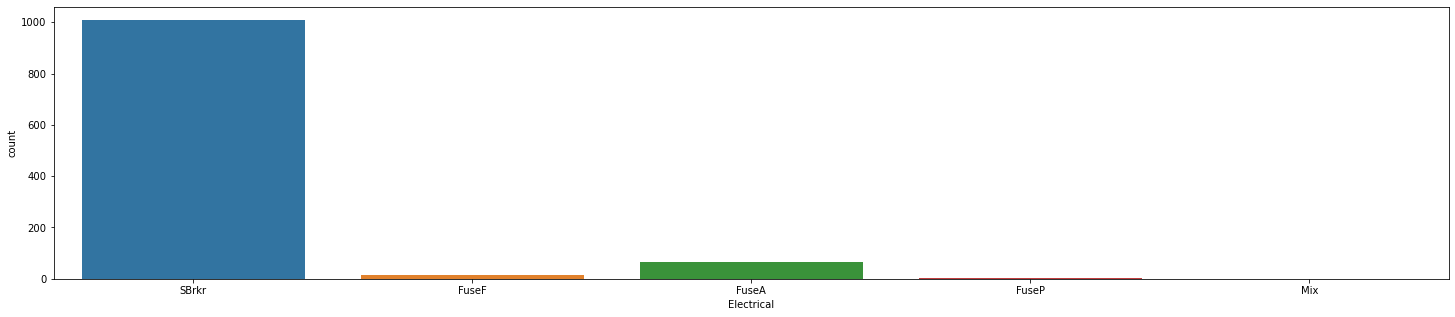

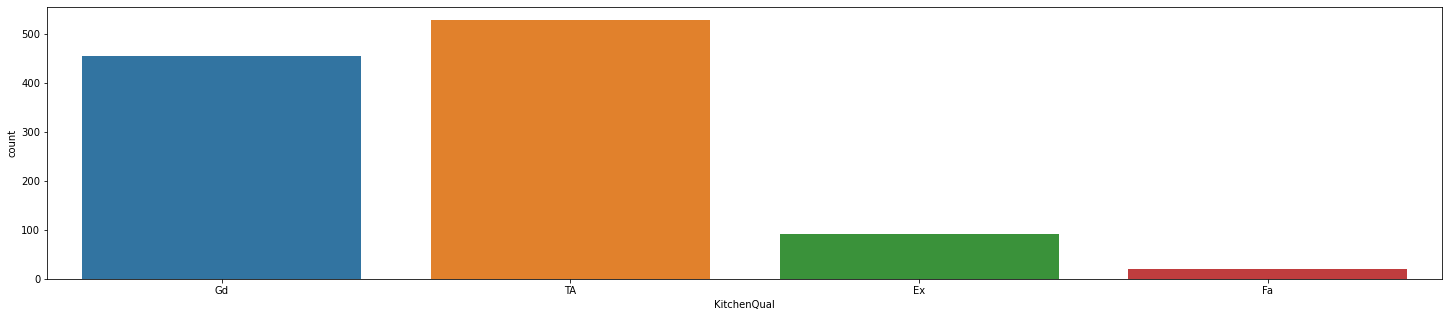

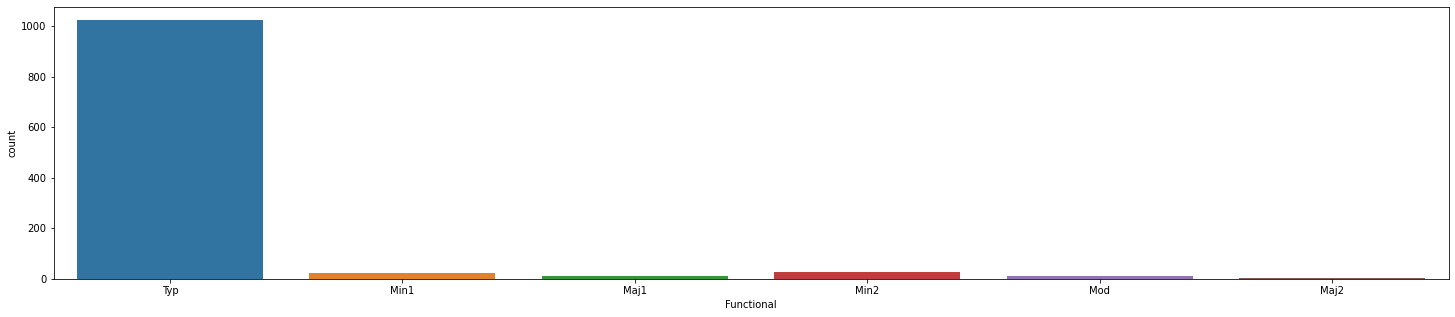

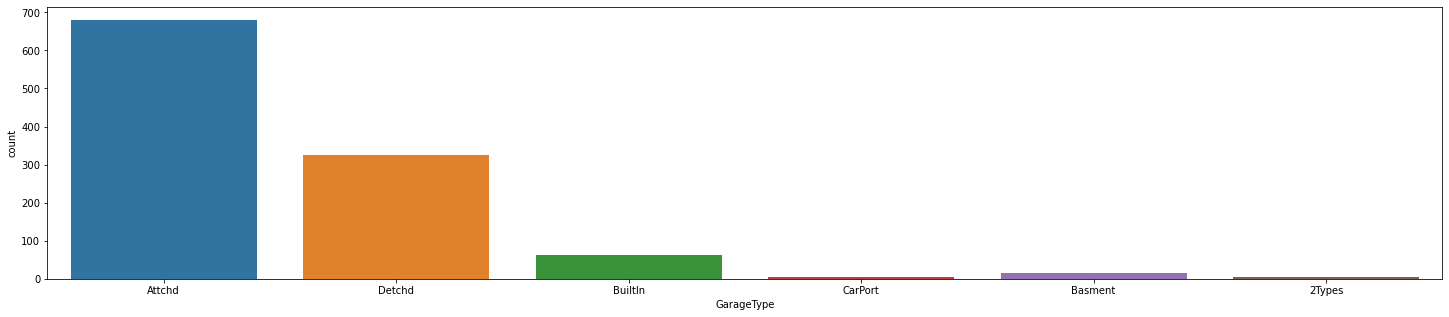

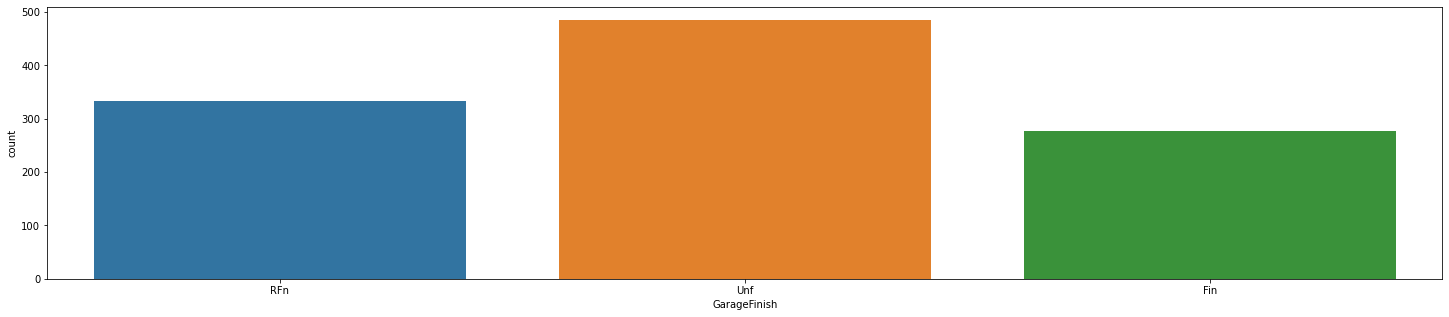

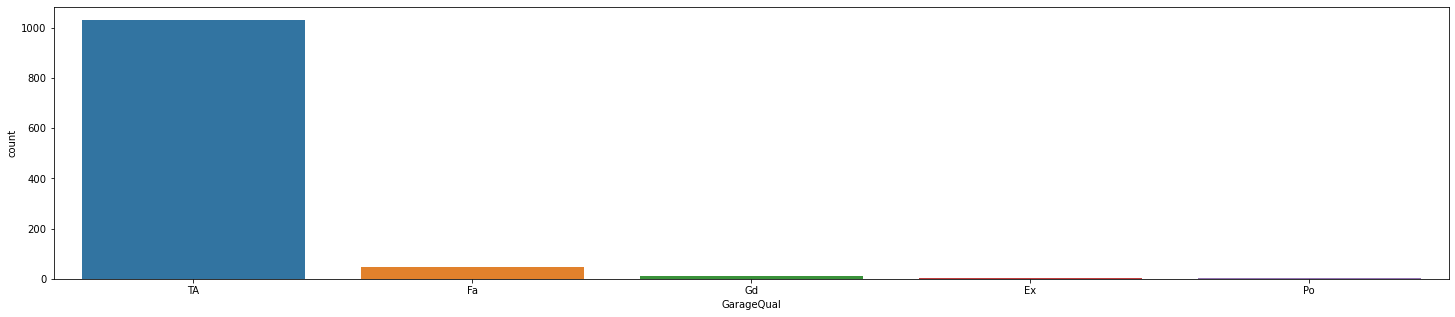

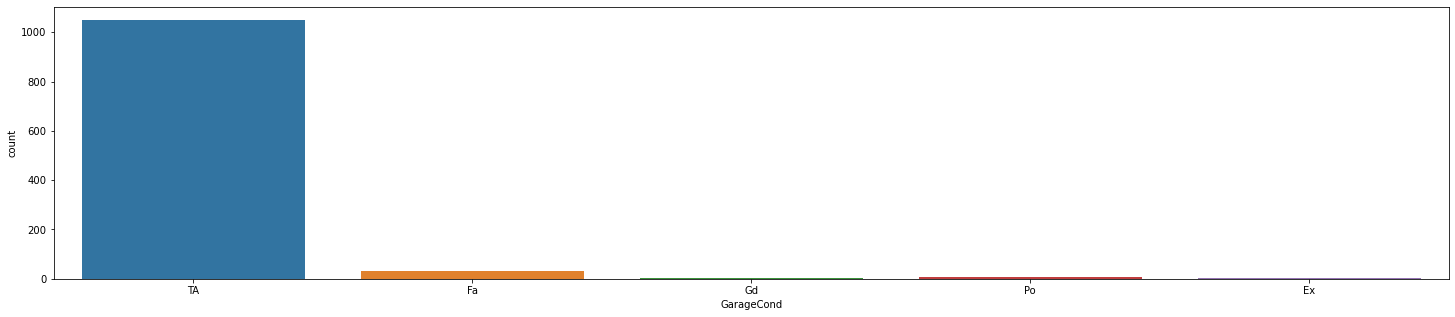

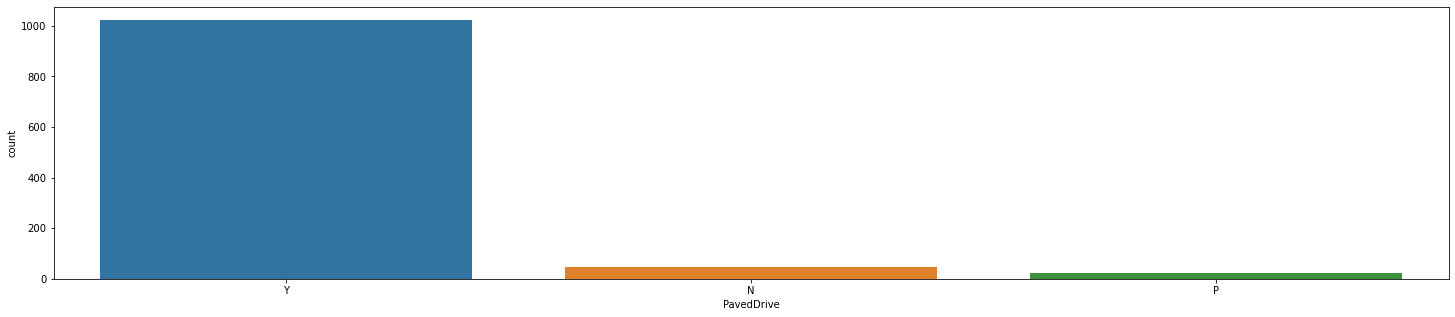

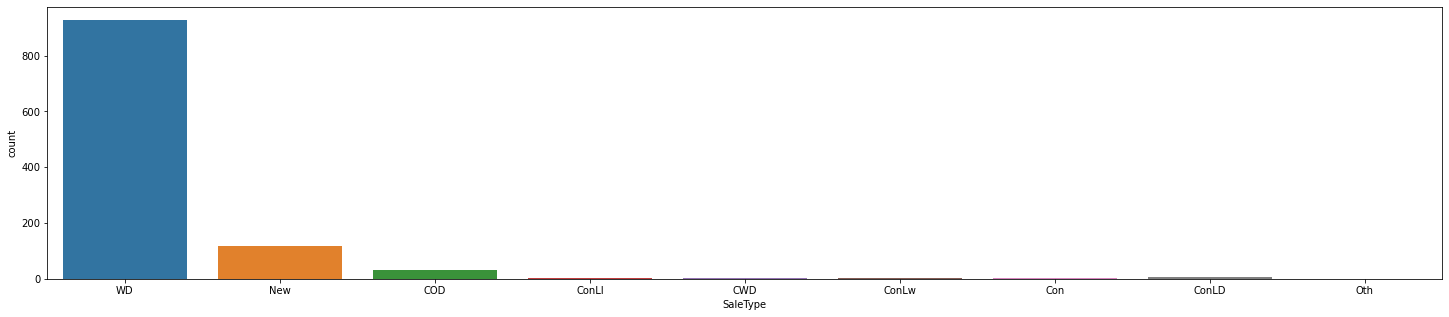

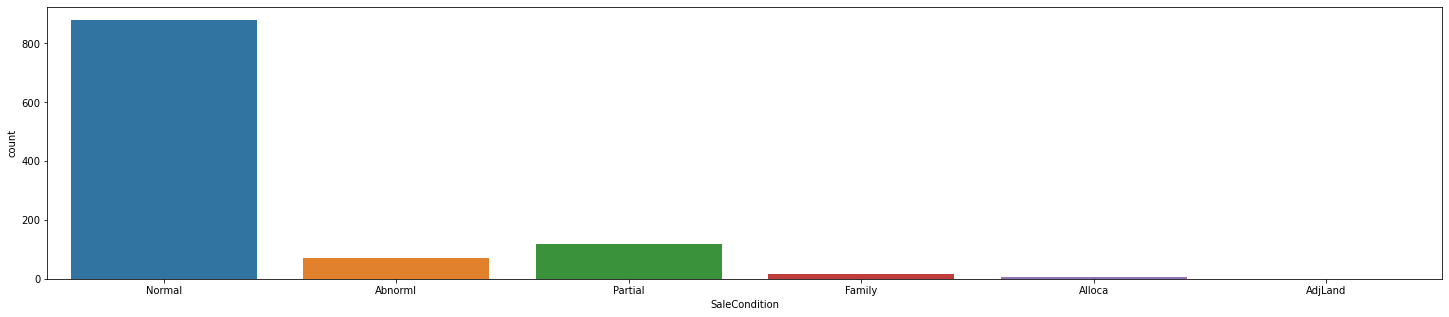

In [47]:
# checking count of all the categories in the categorical columns
for j in unique_count_dict_limit :
     plt.figure(figsize=(25,5))
     sns.countplot (x=j, data = df)
     plt.show()

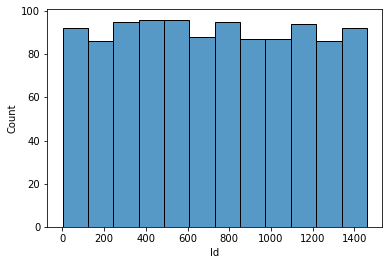

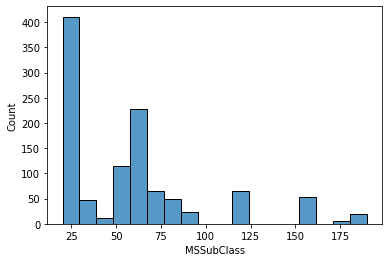

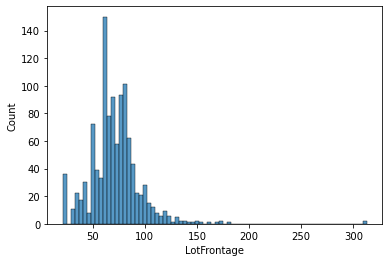

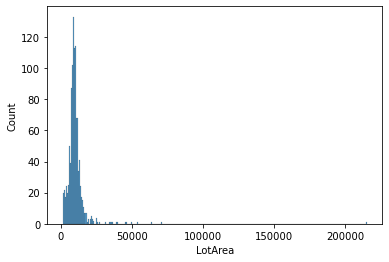

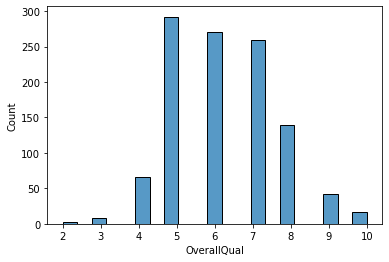

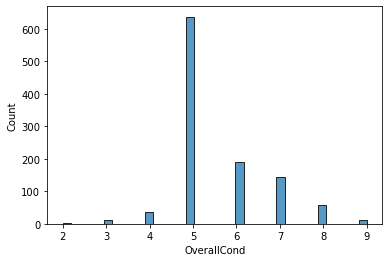

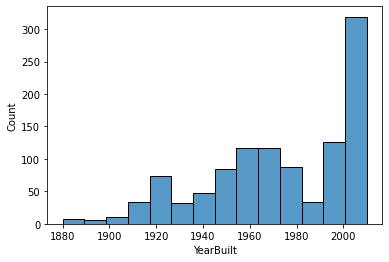

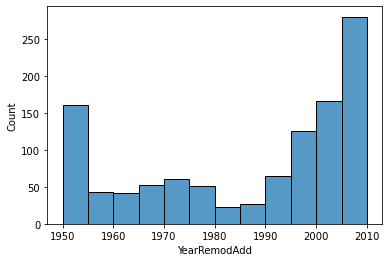

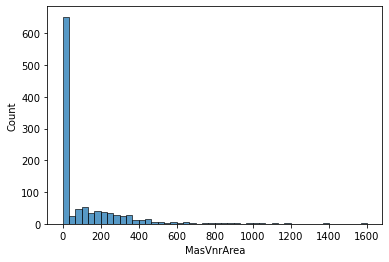

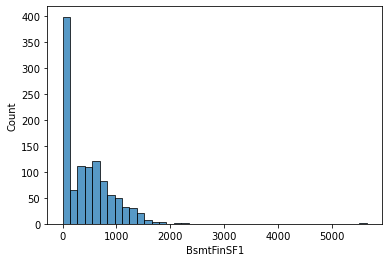

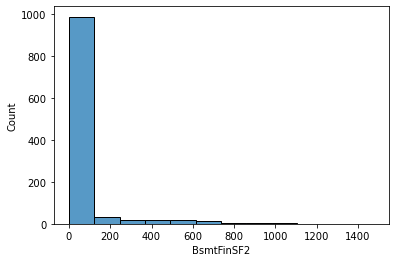

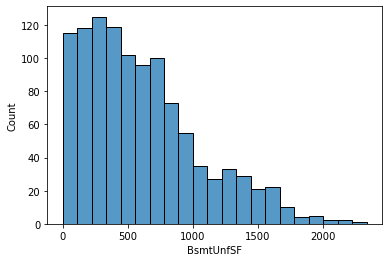

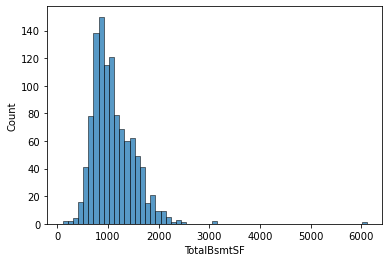

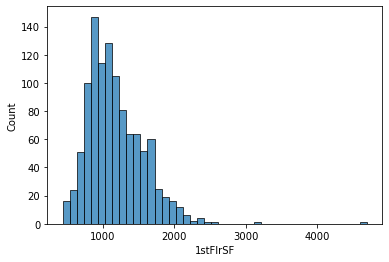

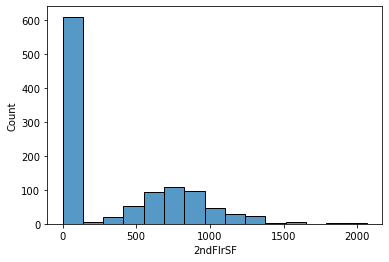

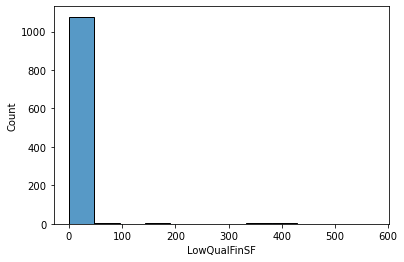

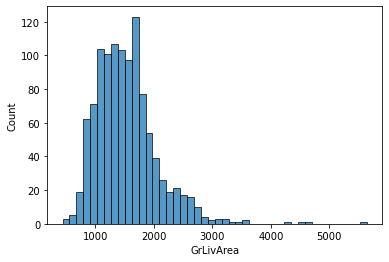

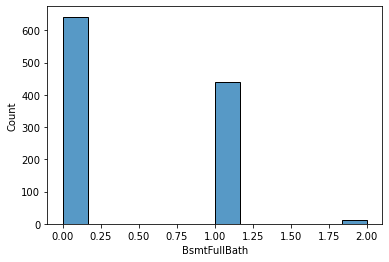

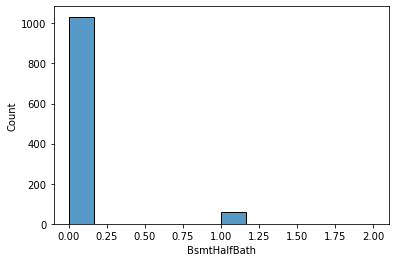

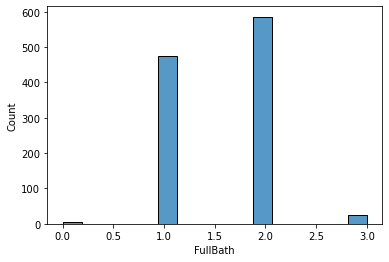

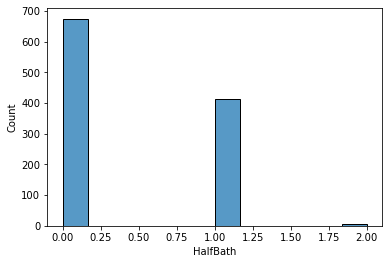

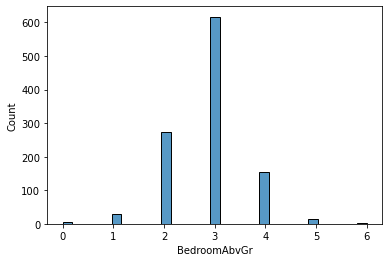

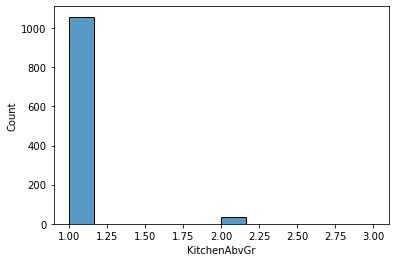

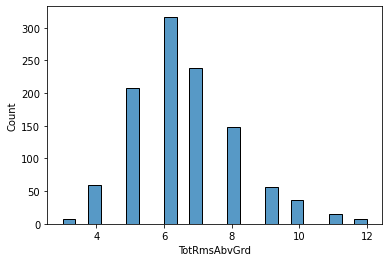

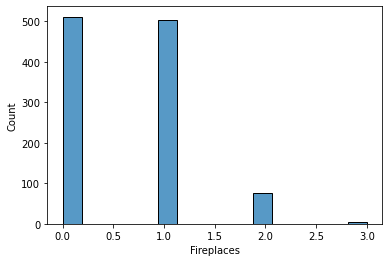

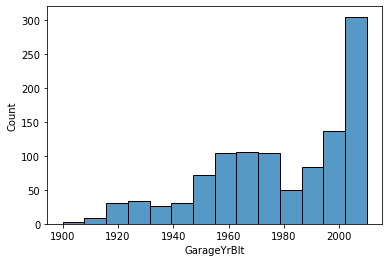

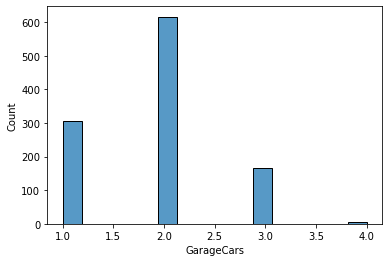

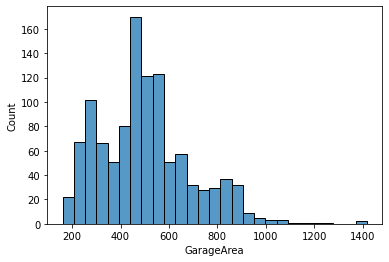

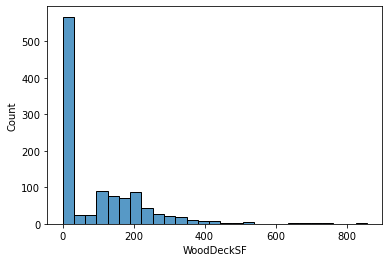

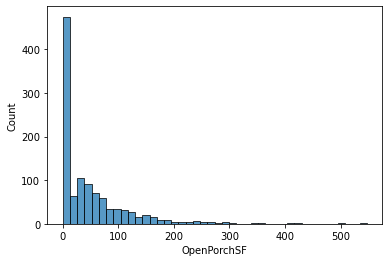

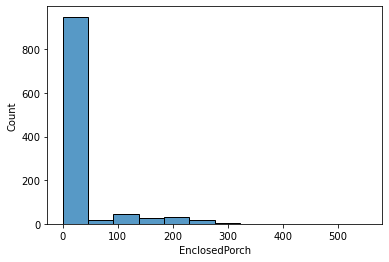

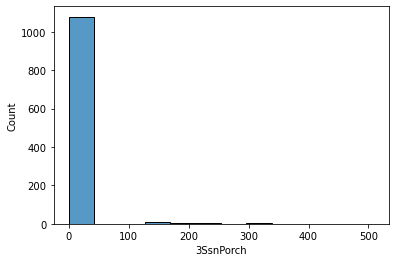

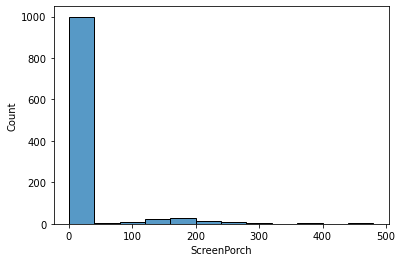

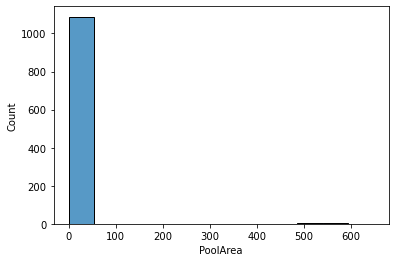

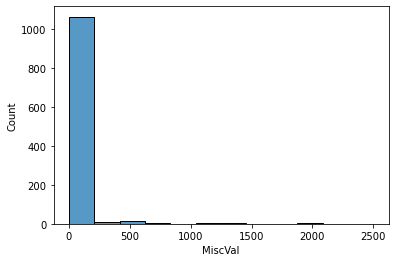

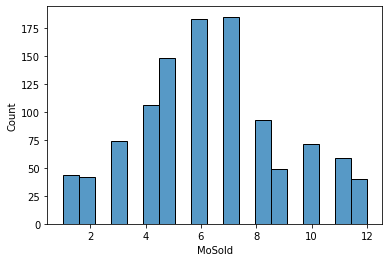

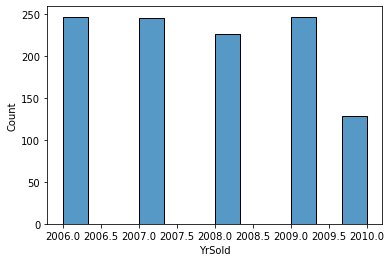

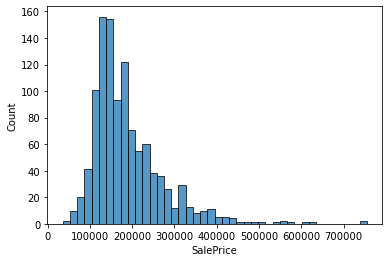

In [48]:
# plotting histograms for all the numerical columns  
for col in num_cols:
    sns.histplot(x=df[col])
    plt.show()

## Bivariate Analysis & Multivariate Analysis

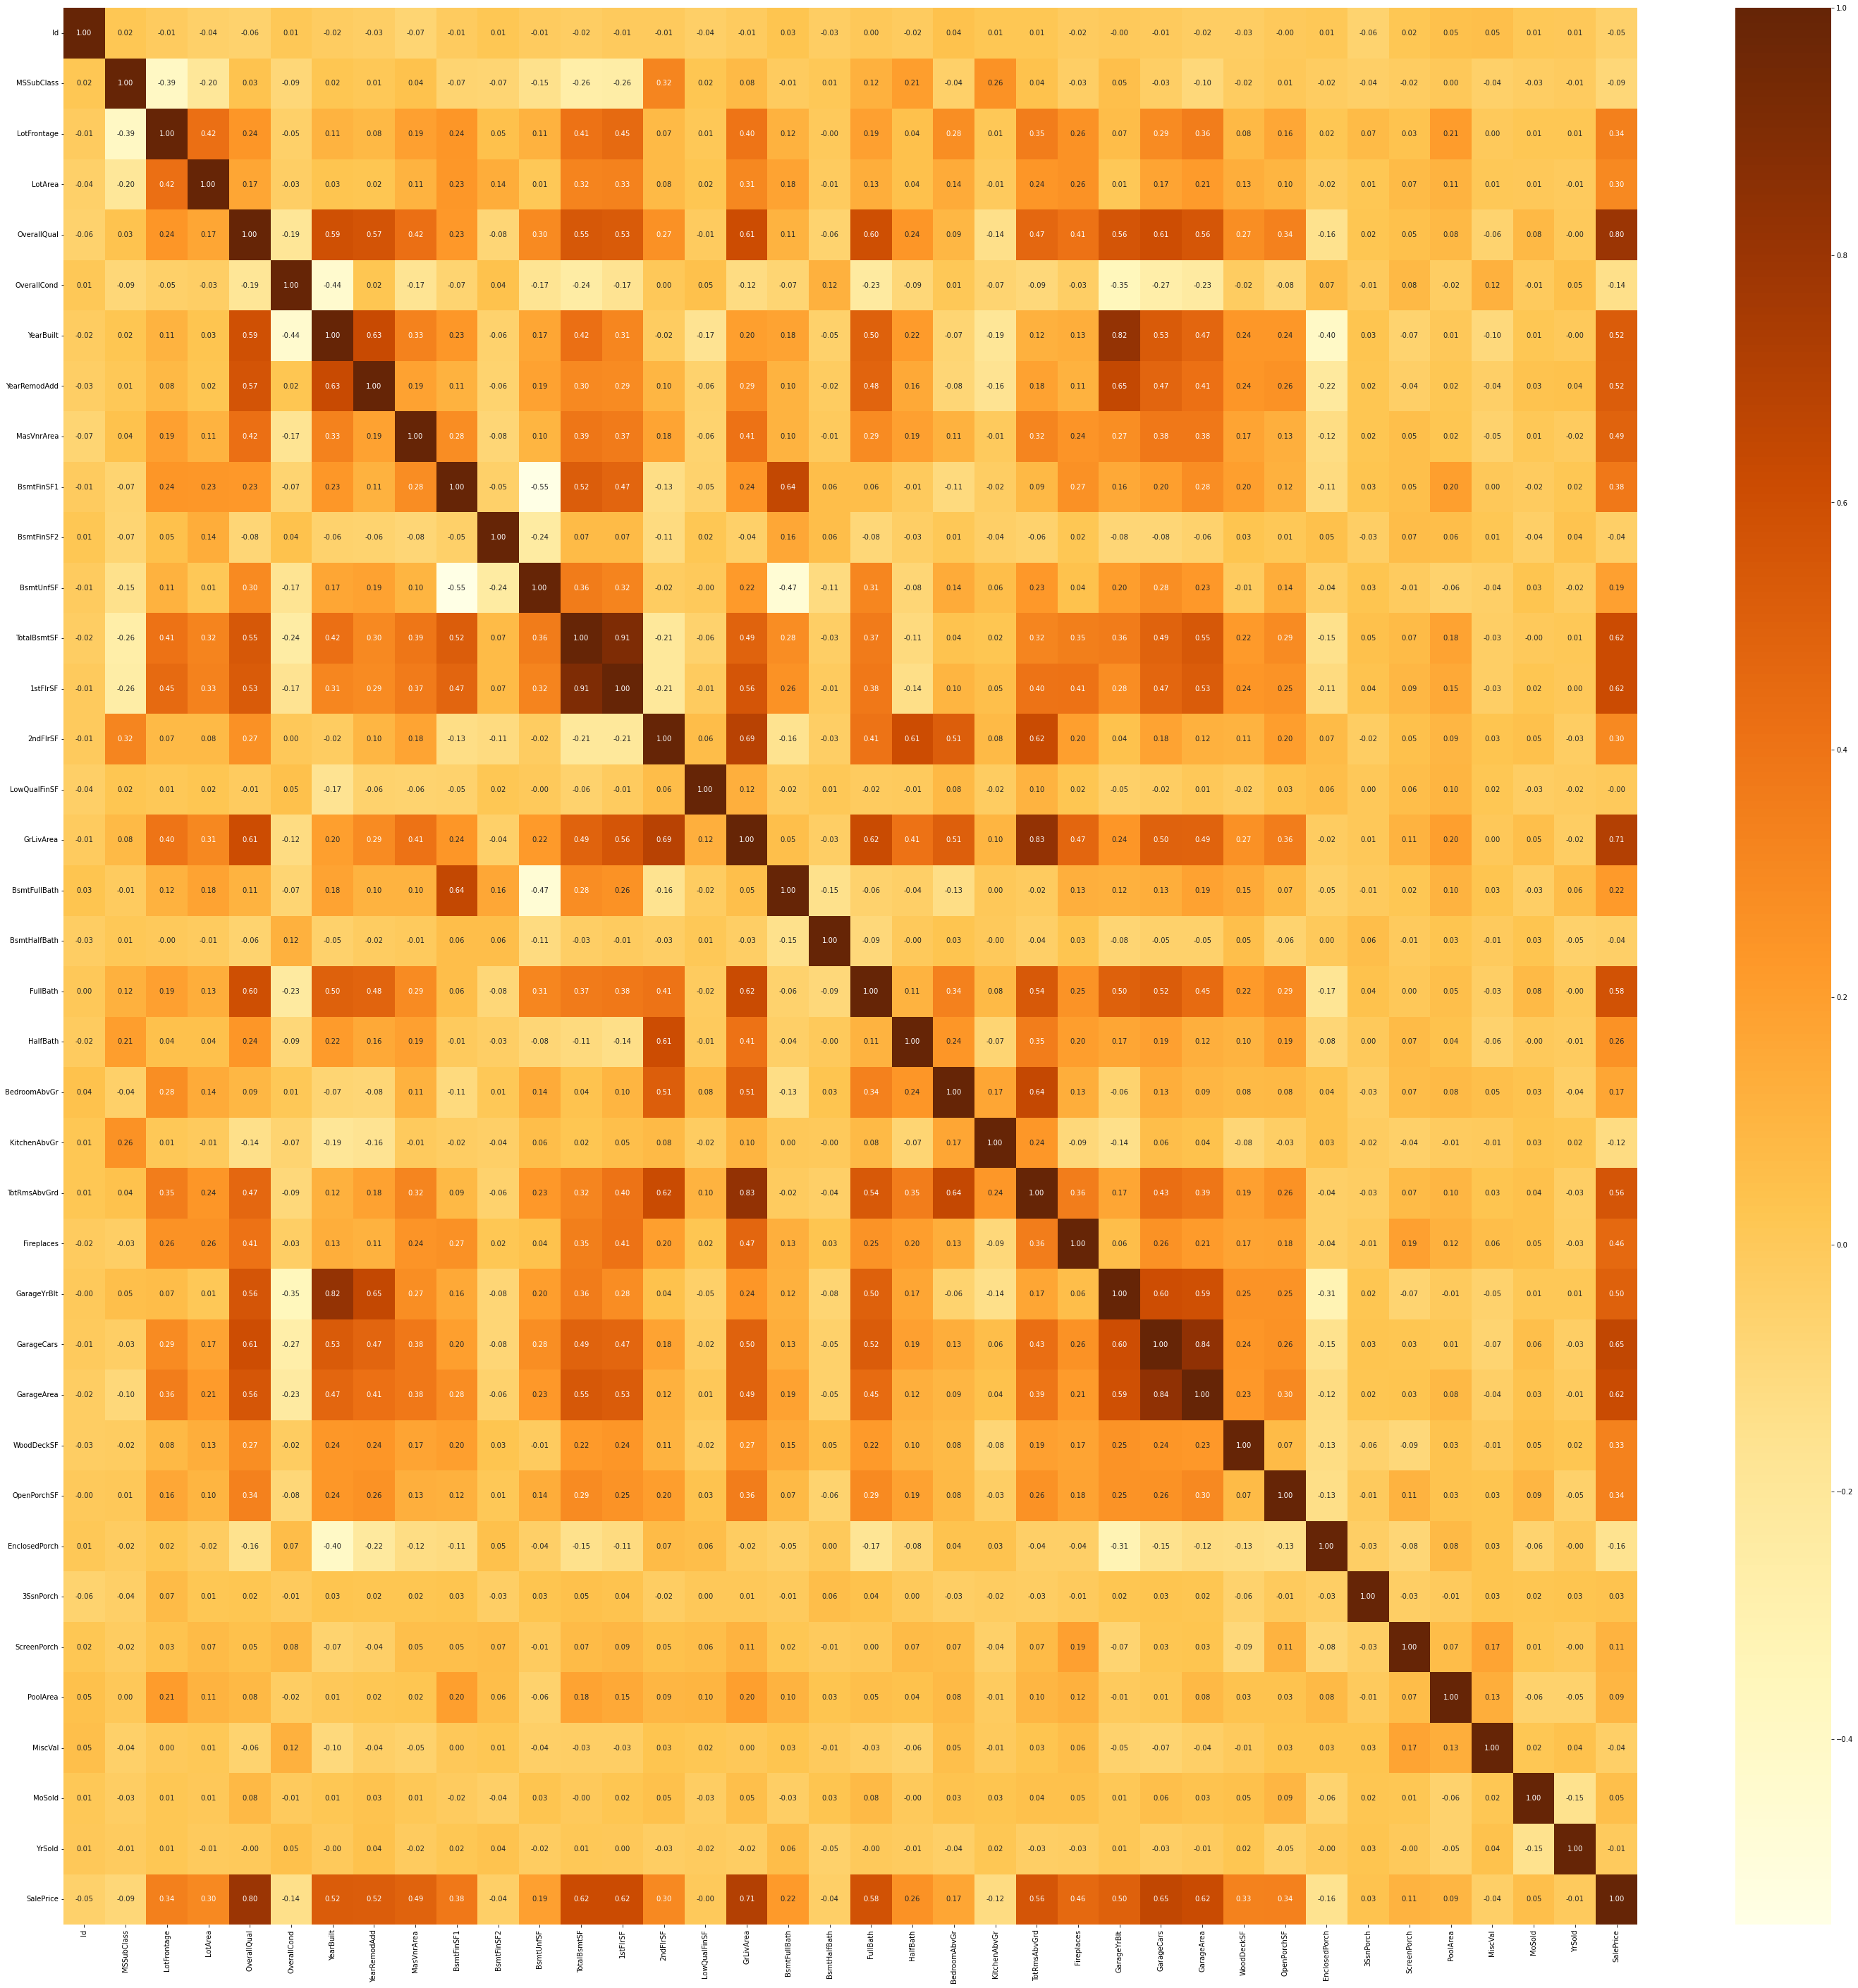

In [49]:
# plotting the heatmap to check for multicollinearity
plt.figure(figsize=(50,50))
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()


In [50]:
df_cor = pd.DataFrame(df[num_cols].corr())

In [51]:
# checking for corelation
df_cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015540,-0.014479,-0.042315,-0.058371,0.008627,-0.022610,-0.030239,-0.072344,-0.013234,...,-0.027597,-0.000987,0.011796,-0.061688,0.015019,0.048487,0.050954,0.007486,0.005307,-0.047595
MSSubClass,0.015540,1.000000,-0.389466,-0.197903,0.031639,-0.085553,0.021605,0.010178,0.040009,-0.069439,...,-0.018514,0.006799,-0.019313,-0.035855,-0.021854,0.003221,-0.043299,-0.025393,-0.012347,-0.089478
LotFrontage,-0.014479,-0.389466,1.000000,0.419714,0.241169,-0.047132,0.107958,0.082938,0.189769,0.239734,...,0.081338,0.160862,0.016058,0.073004,0.034937,0.211959,0.000789,0.014951,0.013366,0.343978
LotArea,-0.042315,-0.197903,0.419714,1.000000,0.169876,-0.033113,0.028954,0.024308,0.106600,0.232341,...,0.133995,0.098051,-0.022789,0.013343,0.072413,0.109294,0.012483,0.006270,-0.006412,0.302268
OverallQual,-0.058371,0.031639,0.241169,0.169876,1.000000,-0.189587,0.590761,0.568582,0.419756,0.230438,...,0.273652,0.335884,-0.155080,0.020081,0.049286,0.080037,-0.062944,0.082995,-0.003529,0.795437
OverallCond,0.008627,-0.085553,-0.047132,-0.033113,-0.189587,1.000000,-0.437647,0.024427,-0.174581,-0.068285,...,-0.018856,-0.084405,0.067124,-0.010881,0.084416,-0.024919,0.121407,-0.009661,0.046775,-0.138511
YearBuilt,-0.022610,0.021605,0.107958,0.028954,0.590761,-0.437647,1.000000,0.625905,0.328897,0.234207,...,0.236512,0.235486,-0.399540,0.030743,-0.065413,0.006402,-0.098054,0.014127,-0.003639,0.523434
YearRemodAdd,-0.030239,0.010178,0.082938,0.024308,0.568582,0.024427,0.625905,1.000000,0.187492,0.111675,...,0.240775,0.259469,-0.220843,0.020567,-0.038039,0.018813,-0.040388,0.031242,0.037684,0.519806
MasVnrArea,-0.072344,0.040009,0.189769,0.106600,0.419756,-0.174581,0.328897,0.187492,1.000000,0.281356,...,0.172564,0.127648,-0.124837,0.022347,0.050990,0.021251,-0.054042,0.012993,-0.015395,0.485409
BsmtFinSF1,-0.013234,-0.069439,0.239734,0.232341,0.230438,-0.068285,0.234207,0.111675,0.281356,1.000000,...,0.198025,0.119597,-0.109888,0.025332,0.054479,0.195060,0.002687,-0.017023,0.015389,0.378678


In [52]:
# resetting the index for the above DataFrame
df_cor = df_cor.reset_index()

In [53]:
df_cor

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Id,1.000000,0.015540,-0.014479,-0.042315,-0.058371,0.008627,-0.022610,-0.030239,-0.072344,...,-0.027597,-0.000987,0.011796,-0.061688,0.015019,0.048487,0.050954,0.007486,0.005307,-0.047595
1,MSSubClass,0.015540,1.000000,-0.389466,-0.197903,0.031639,-0.085553,0.021605,0.010178,0.040009,...,-0.018514,0.006799,-0.019313,-0.035855,-0.021854,0.003221,-0.043299,-0.025393,-0.012347,-0.089478
2,LotFrontage,-0.014479,-0.389466,1.000000,0.419714,0.241169,-0.047132,0.107958,0.082938,0.189769,...,0.081338,0.160862,0.016058,0.073004,0.034937,0.211959,0.000789,0.014951,0.013366,0.343978
3,LotArea,-0.042315,-0.197903,0.419714,1.000000,0.169876,-0.033113,0.028954,0.024308,0.106600,...,0.133995,0.098051,-0.022789,0.013343,0.072413,0.109294,0.012483,0.006270,-0.006412,0.302268
4,OverallQual,-0.058371,0.031639,0.241169,0.169876,1.000000,-0.189587,0.590761,0.568582,0.419756,...,0.273652,0.335884,-0.155080,0.020081,0.049286,0.080037,-0.062944,0.082995,-0.003529,0.795437
5,OverallCond,0.008627,-0.085553,-0.047132,-0.033113,-0.189587,1.000000,-0.437647,0.024427,-0.174581,...,-0.018856,-0.084405,0.067124,-0.010881,0.084416,-0.024919,0.121407,-0.009661,0.046775,-0.138511
6,YearBuilt,-0.022610,0.021605,0.107958,0.028954,0.590761,-0.437647,1.000000,0.625905,0.328897,...,0.236512,0.235486,-0.399540,0.030743,-0.065413,0.006402,-0.098054,0.014127,-0.003639,0.523434
7,YearRemodAdd,-0.030239,0.010178,0.082938,0.024308,0.568582,0.024427,0.625905,1.000000,0.187492,...,0.240775,0.259469,-0.220843,0.020567,-0.038039,0.018813,-0.040388,0.031242,0.037684,0.519806
8,MasVnrArea,-0.072344,0.040009,0.189769,0.106600,0.419756,-0.174581,0.328897,0.187492,1.000000,...,0.172564,0.127648,-0.124837,0.022347,0.050990,0.021251,-0.054042,0.012993,-0.015395,0.485409
9,BsmtFinSF1,-0.013234,-0.069439,0.239734,0.232341,0.230438,-0.068285,0.234207,0.111675,0.281356,...,0.198025,0.119597,-0.109888,0.025332,0.054479,0.195060,0.002687,-0.017023,0.015389,0.378678


In [54]:
# checking for the columns having corelation of more than 0.6 and less than -0.6 as these will be higly corelated columns 
cor_dict = {}

for i in num_cols:
    a = df_cor[((df_cor[i]>=0.6) & (df_cor[i]<1)) | ((df_cor[i] >-1 ) & df_cor[i]<=-0.6)]
    cor_dict[i] = list(a['index'])

In [55]:
a

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
4,OverallQual,-0.058371,0.031639,0.241169,0.169876,1.000000,-0.189587,0.590761,0.568582,0.419756,...,0.273652,0.335884,-0.155080,0.020081,0.049286,0.080037,-0.062944,0.082995,-0.003529,0.795437
12,TotalBsmtSF,-0.024541,-0.264277,0.407566,0.324476,0.547448,-0.243419,0.423763,0.302488,0.393759,...,0.222054,0.288442,-0.147752,0.045633,0.071903,0.182058,-0.034368,-0.003155,0.011630,0.617741
13,1stFlrSF,-0.007492,-0.258207,0.453035,0.331295,0.527908,-0.166191,0.311928,0.286565,0.366980,...,0.242016,0.249695,-0.110405,0.035985,0.088231,0.152996,-0.032237,0.021011,0.001197,0.617692
16,GrLivArea,-0.013772,0.078213,0.397260,0.308590,0.610102,-0.115250,0.198778,0.287412,0.411984,...,0.266581,0.355081,-0.019505,0.006201,0.107447,0.199577,0.001335,0.053230,-0.024798,0.707481
26,GarageCars,-0.009568,-0.031638,0.285748,0.173525,0.605466,-0.269616,0.533258,0.473753,0.376417,...,0.237785,0.260375,-0.151081,0.027883,0.025019,0.012829,-0.070912,0.055310,-0.031478,0.652103
27,GarageArea,-0.023290,-0.095374,0.357030,0.213104,0.555315,-0.233585,0.470809,0.413917,0.379851,...,0.226120,0.303611,-0.117481,0.022449,0.025472,0.081126,-0.038172,0.034828,-0.014508,0.620772


In [56]:
cor_dict

{'Id': [],
 'MSSubClass': [],
 'LotFrontage': [],
 'LotArea': [],
 'OverallQual': ['GrLivArea', 'GarageCars', 'SalePrice'],
 'OverallCond': [],
 'YearBuilt': ['YearRemodAdd', 'GarageYrBlt'],
 'YearRemodAdd': ['YearBuilt', 'GarageYrBlt'],
 'MasVnrArea': [],
 'BsmtFinSF1': ['BsmtFullBath'],
 'BsmtFinSF2': [],
 'BsmtUnfSF': [],
 'TotalBsmtSF': ['1stFlrSF', 'SalePrice'],
 '1stFlrSF': ['TotalBsmtSF', 'SalePrice'],
 '2ndFlrSF': ['GrLivArea', 'HalfBath', 'TotRmsAbvGrd'],
 'LowQualFinSF': [],
 'GrLivArea': ['OverallQual',
  '2ndFlrSF',
  'FullBath',
  'TotRmsAbvGrd',
  'SalePrice'],
 'BsmtFullBath': ['BsmtFinSF1'],
 'BsmtHalfBath': [],
 'FullBath': ['GrLivArea'],
 'HalfBath': ['2ndFlrSF'],
 'BedroomAbvGr': ['TotRmsAbvGrd'],
 'KitchenAbvGr': [],
 'TotRmsAbvGrd': ['2ndFlrSF', 'GrLivArea', 'BedroomAbvGr'],
 'Fireplaces': [],
 'GarageYrBlt': ['YearBuilt', 'YearRemodAdd', 'GarageCars'],
 'GarageCars': ['OverallQual', 'GarageYrBlt', 'GarageArea', 'SalePrice'],
 'GarageArea': ['GarageCars', 'SalePric

## Analyzing dependent variables with high collinearity among themselves & with Target Variable (SalePrice)

In [57]:
# creating variables and storing the highly correlated columns 
overallQuall = ['GrLivArea', 'GarageCars', 'SalePrice']
yearbuilt = ['YearRemodAdd', 'GarageYrBlt']
secondndFlrSF =  ['GrLivArea', 'HalfBath', 'TotRmsAbvGrd']
GrLivArea = ['OverallQual','2ndFlrSF','FullBath','TotRmsAbvGrd','SalePrice']
GarageYrBlt =  ['YearBuilt', 'YearRemodAdd', 'GarageCars'],
GarageCars =  ['OverallQual', 'GarageYrBlt', 'GarageArea', 'SalePrice']
GarageArea =  ['GarageCars', 'SalePrice']
SalePrice =  ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']
BedroomAbvGr = ['TotRmsAbvGrd']

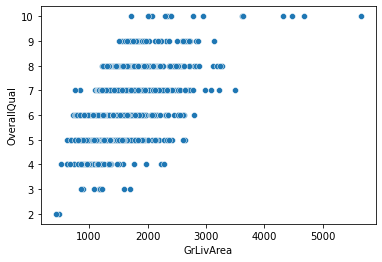

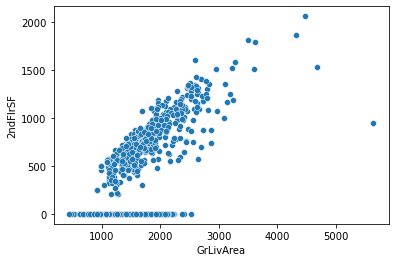

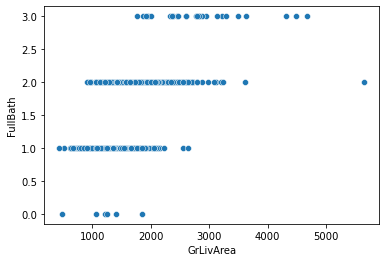

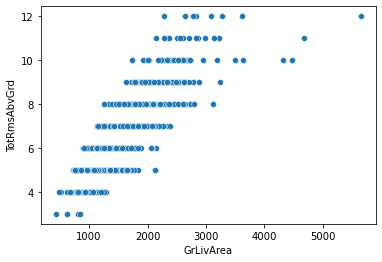

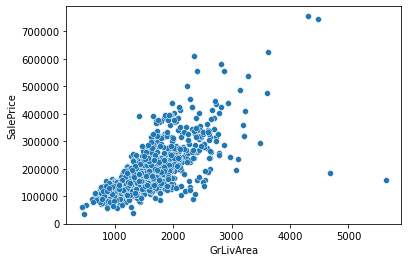

In [58]:
# plotting the scatter plot to visually look for the correlation amongst the variables
for i in GrLivArea:
    sns.scatterplot(x = df['GrLivArea'],y = df[i],legend = 'full')
    plt.show()

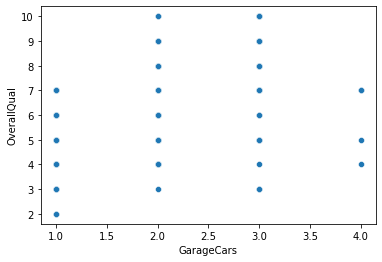

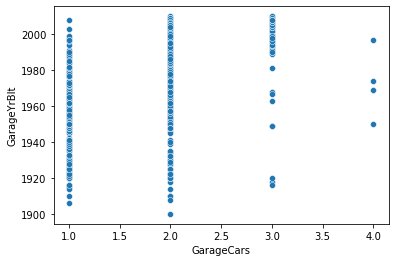

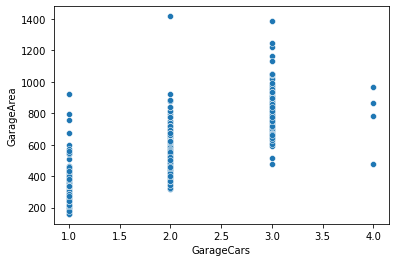

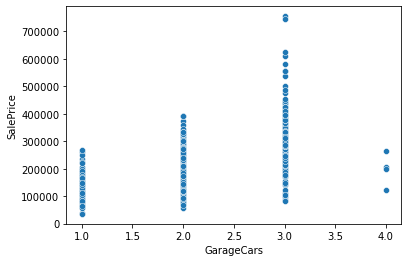

In [59]:
for i in GarageCars:
    sns.scatterplot(x = df['GarageCars'],y = df[i],legend = 'full')
    plt.show()

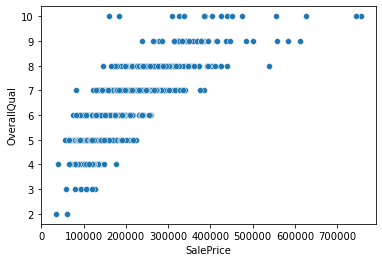

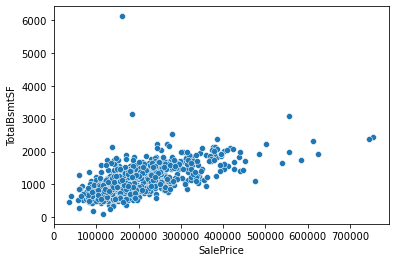

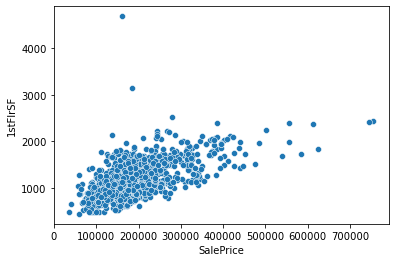

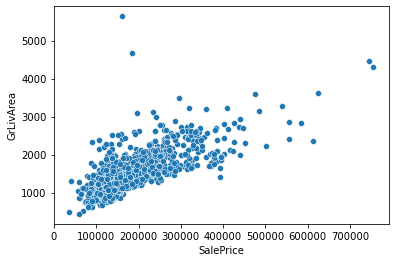

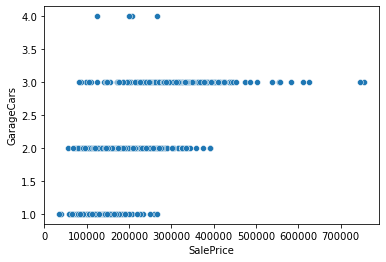

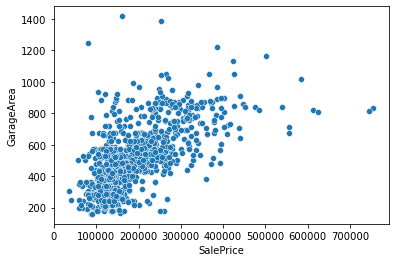

In [60]:
for i in SalePrice:
    sns.scatterplot(x = df['SalePrice'],y = df[i],legend = 'full')
    plt.show()

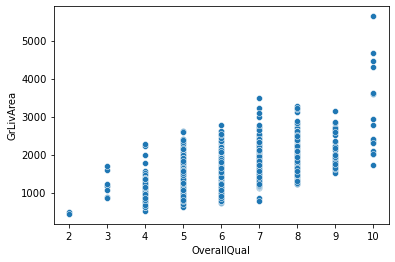

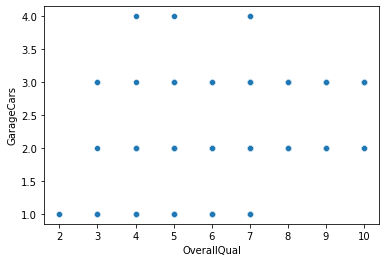

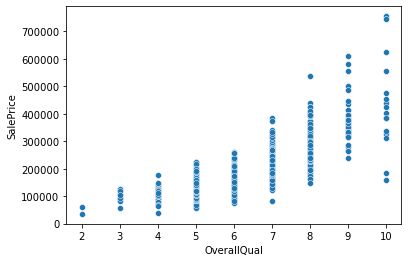

In [61]:
for i in overallQuall:
    sns.scatterplot(x = df['OverallQual'],y = df[i],legend = 'full')
    plt.show()

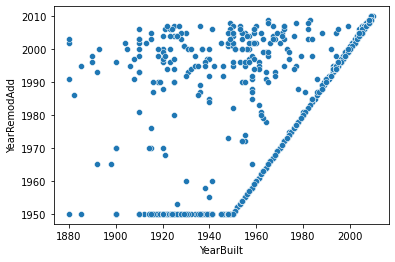

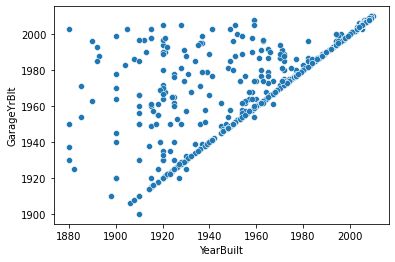

In [62]:
for i in yearbuilt:
    sns.scatterplot(x = df['YearBuilt'],y = df[i],legend = 'full')
    plt.show()

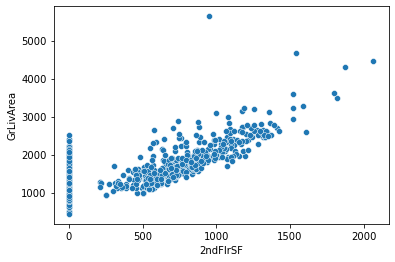

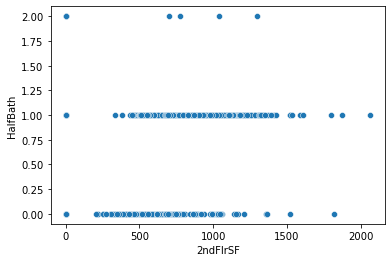

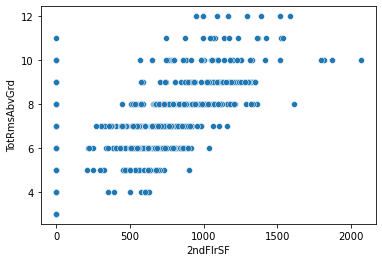

In [63]:
for i in secondndFlrSF:
    sns.scatterplot(x = df['2ndFlrSF'],y = df[i],legend = 'full')
    plt.show()

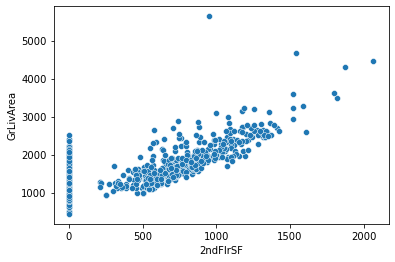

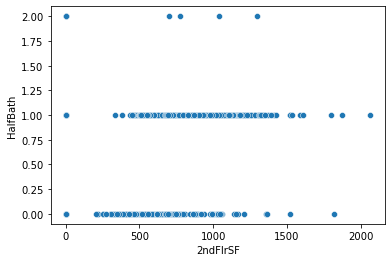

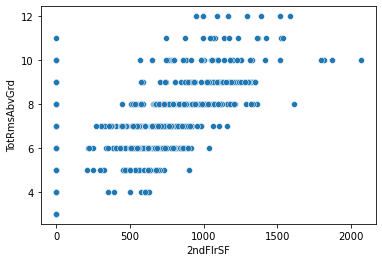

In [64]:
for i in secondndFlrSF:
    sns.scatterplot(x = df['2ndFlrSF'],y = df[i],legend = 'full')
    plt.show()

## Dropping few variables after analysing the multi collinearity

In [65]:
drop_column = ['YearBuilt','2ndFlrSF','GarageYrBlt']

In [66]:
df.drop(drop_column,axis = 1,inplace = True)

In [67]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [68]:
# dropping columns from num_cols 
for i in drop_column:
    num_cols.remove(i)

In [69]:
# Creating dummy columns for all the categorical columns  
df = pd.get_dummies(df, columns=cat_cols,drop_first=True,dtype = 'int')

In [70]:
# Number of columns are changed to 217 
df.shape

(1094, 217)

In [71]:
# Checking first few rows of the DataFrame after creating dummies 
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [72]:
# checking for variance in the dataset before scaling so as to choose the best scaling technique
df.cov()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,177203.522958,274.593805,-149.385357,-1.462825e+05,-33.584456,3.873118,-266.437728,-5806.518428,-2611.307314,1002.022242,...,-0.919604,-0.585089,-2.526605,4.333251e-01,3.522748,-0.282137,-0.629693,0.281096,5.422138,-2.824983
MSSubClass,274.593805,1762.013566,-400.679875,-6.822120e+04,1.815254,-3.830007,8.942230,320.213508,-1366.241597,-493.020652,...,0.028923,0.073636,-0.668756,-3.305479e-02,0.294963,-0.005607,0.048698,0.050028,0.646461,-0.767921
LotFrontage,-149.385357,-400.679875,600.684148,8.447704e+04,8.078819,-1.231973,42.546096,886.796904,2754.062657,182.959150,...,0.019873,-0.074143,0.964215,2.199471e-04,-0.825166,-0.009844,-0.026128,0.042385,-0.886959,0.959385
LotArea,-146282.538321,-68221.201141,84477.043104,6.744104e+07,1906.773208,-290.018531,4178.225866,166914.810372,894354.166742,181081.650854,...,4.149095,-6.281231,129.387753,-7.130342e-01,-79.211795,-1.804526,-6.414528,-10.679996,-40.400606,140.943069
OverallQual,-33.584456,1.815254,8.078819,1.906773e+03,1.868133,-0.276359,16.266047,109.389880,147.631272,-17.685608,...,0.002065,0.000923,0.148458,-2.056464e-03,-0.129807,-0.001142,-0.004105,-0.007739,-0.097886,0.147779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.282137,-0.005607,-0.009844,-1.804526e+00,-0.001142,0.000388,-0.032860,-0.100508,-0.124604,-0.041402,...,-0.000003,-0.000003,-0.000097,-8.363008e-07,0.000139,0.000914,-0.000005,-0.000015,-0.000736,-0.000100
SaleCondition_Alloca,-0.629693,0.048698,-0.026128,-6.414528e+00,-0.004105,-0.001331,-0.017837,0.229521,1.372231,-0.248411,...,-0.000015,-0.000020,-0.000582,-5.017805e-06,0.000833,-0.000005,0.005459,-0.000090,-0.004416,-0.000597
SaleCondition_Family,0.281096,0.050028,0.042385,-1.068000e+01,-0.007739,-0.003079,-0.172449,-0.189753,0.790983,-0.091986,...,-0.000045,-0.000060,-0.001746,-1.505341e-05,0.001584,-0.000015,-0.000090,0.016197,-0.013247,-0.001791
SaleCondition_Normal,5.422138,0.646461,-0.886959,-4.040061e+01,-0.097886,0.075239,-1.340344,-8.346667,-7.591877,4.762113,...,-0.000378,0.000716,-0.085370,-7.359447e-04,0.096549,-0.000736,-0.004416,-0.013247,0.157492,-0.087577


## Since LotArea has a variance of ~6.744104e+07 while OverallQuall has a variance of ~1.86. There is a huge difference between the variance of the two, hence using MinMaxScaler as our scaling technique will be a better choice

In [73]:
# Applying MinMaxScaler to all the columns of the DataFrame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [74]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.625,0.428571,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.202055,0.038795,0.500,0.857143,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.160959,0.046507,0.625,0.428571,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.133562,0.038561,0.625,0.428571,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.215753,0.060576,0.750,0.428571,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.140411,0.030929,0.500,0.428571,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.997944,0.000000,0.219178,0.055505,0.500,0.571429,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.998629,0.294118,0.154110,0.036187,0.625,1.000000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.999315,0.000000,0.160959,0.039342,0.375,0.571429,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


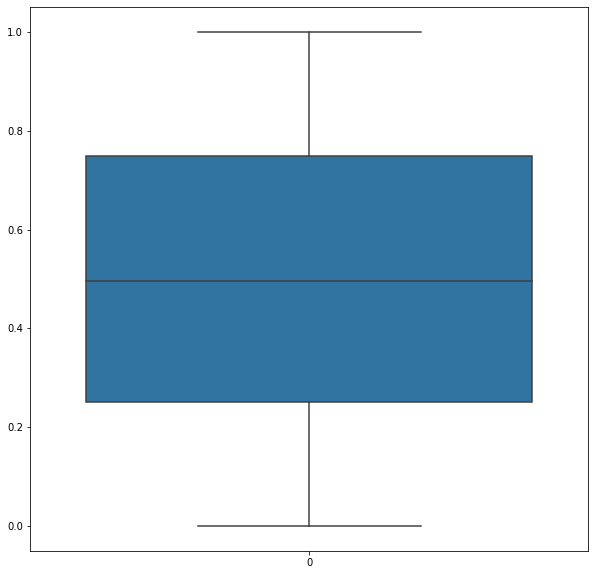

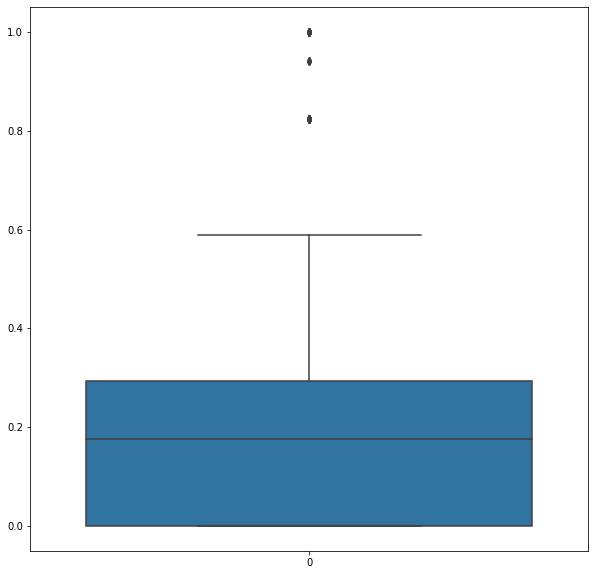

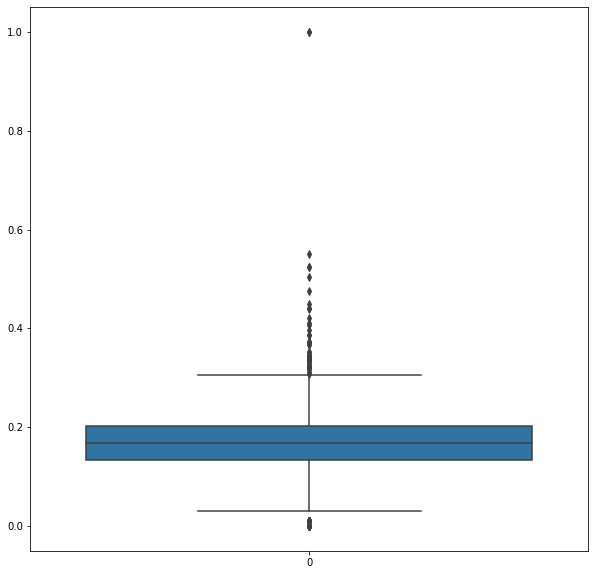

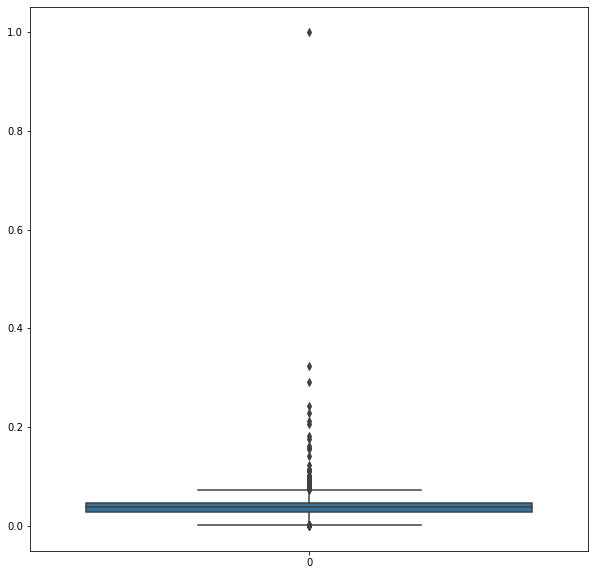

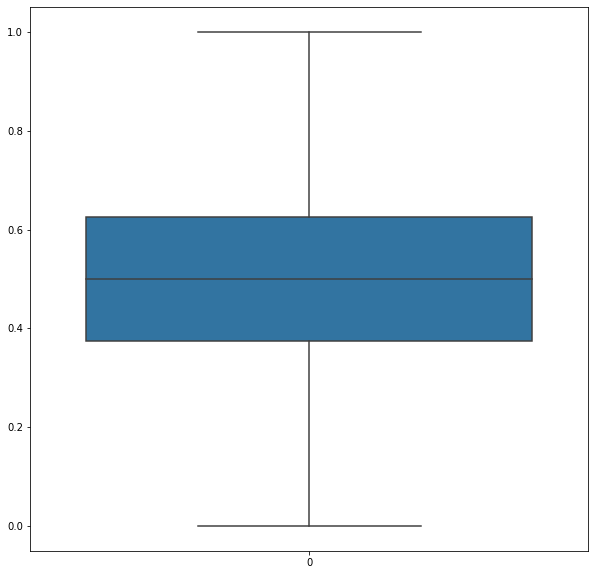

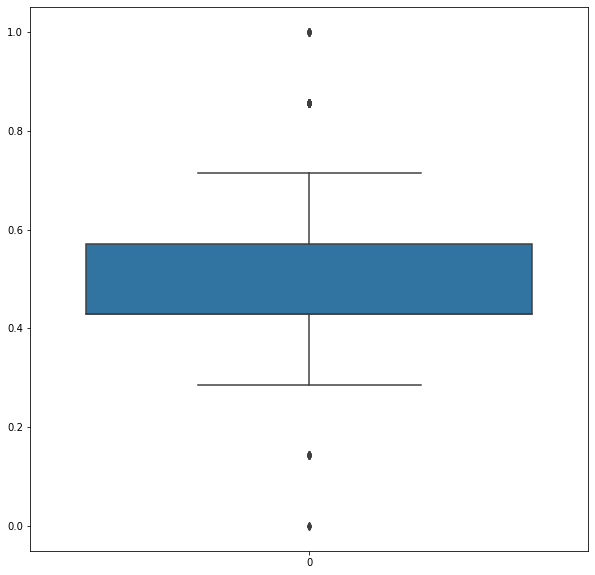

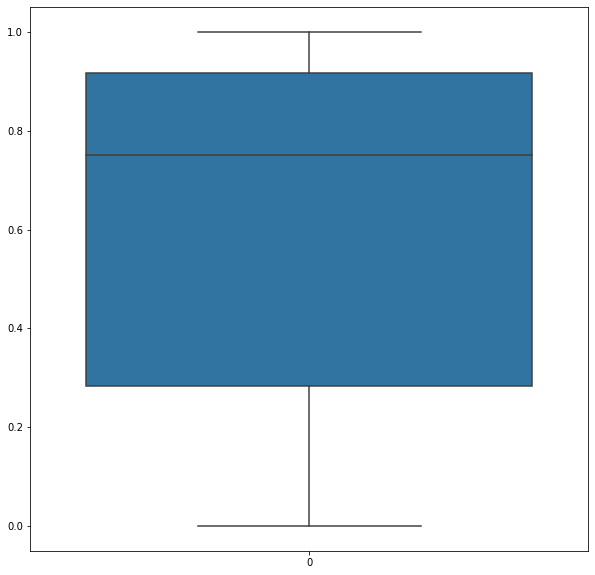

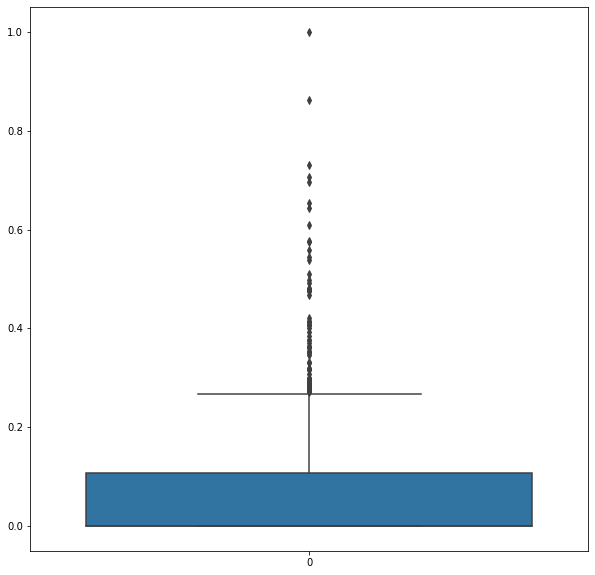

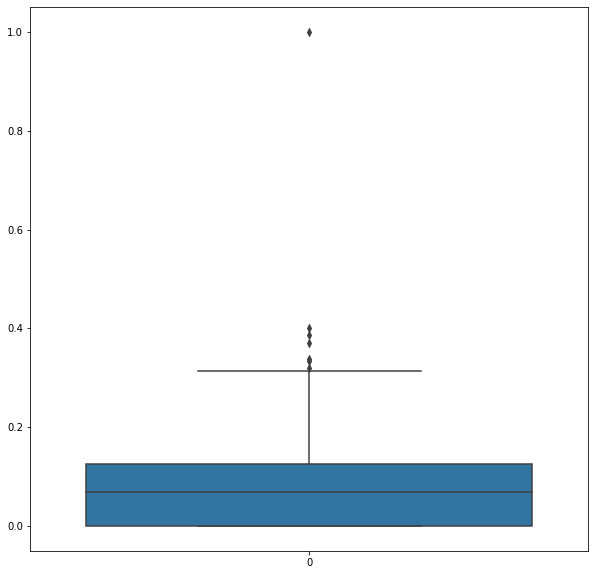

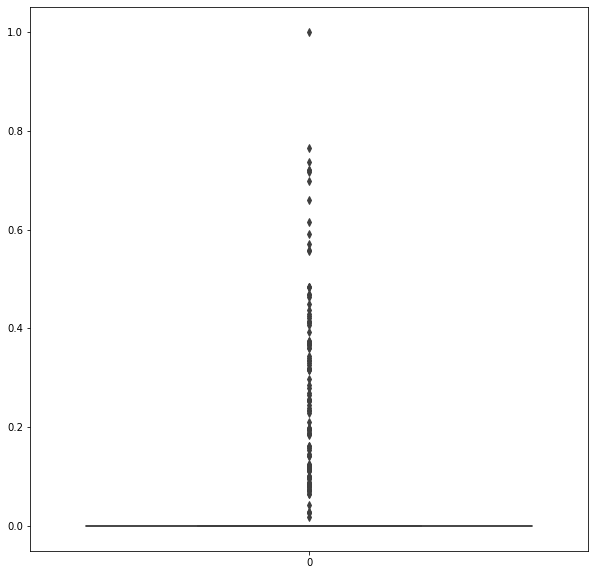

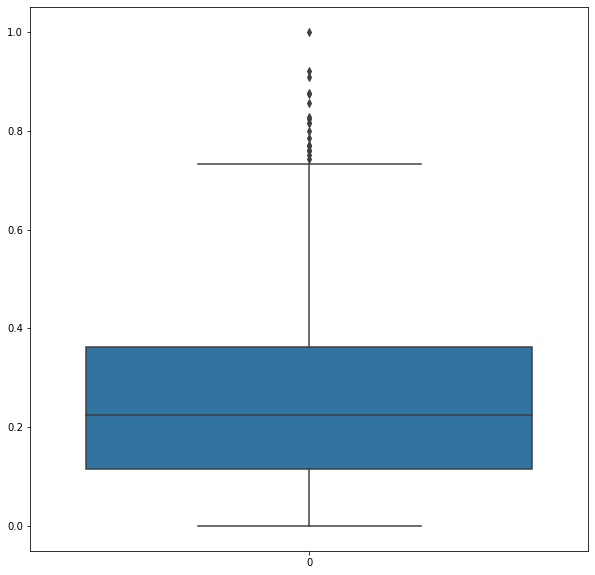

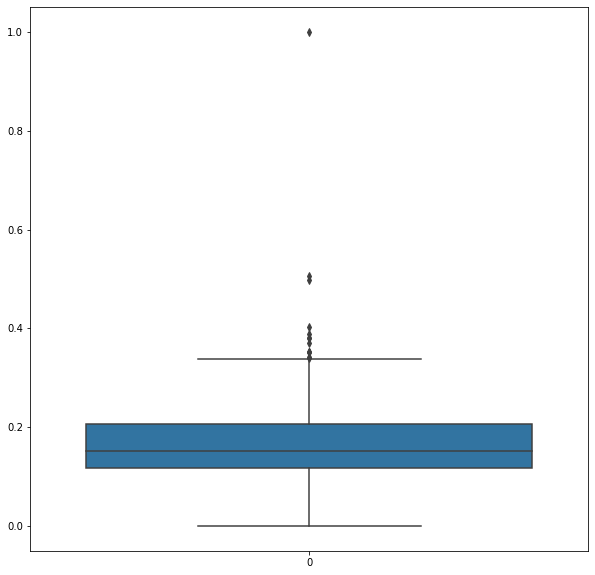

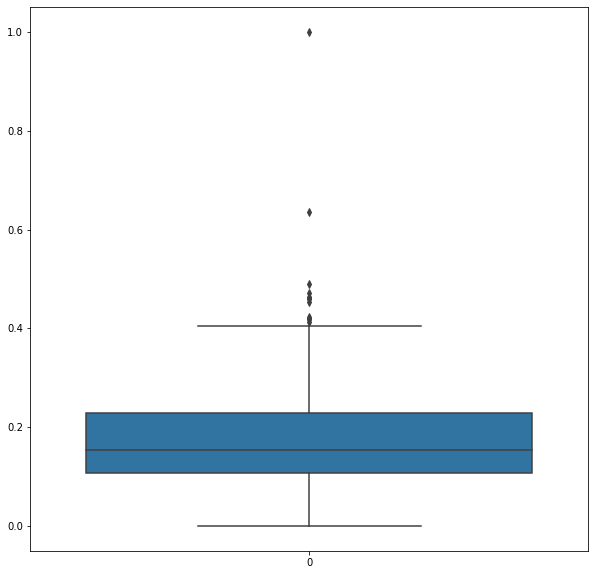

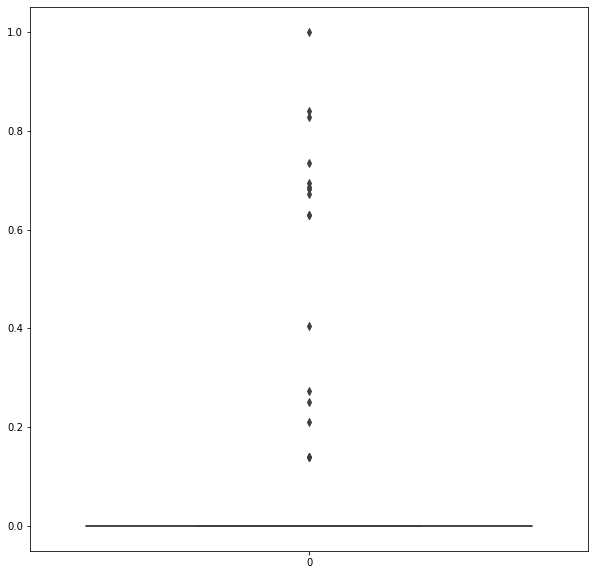

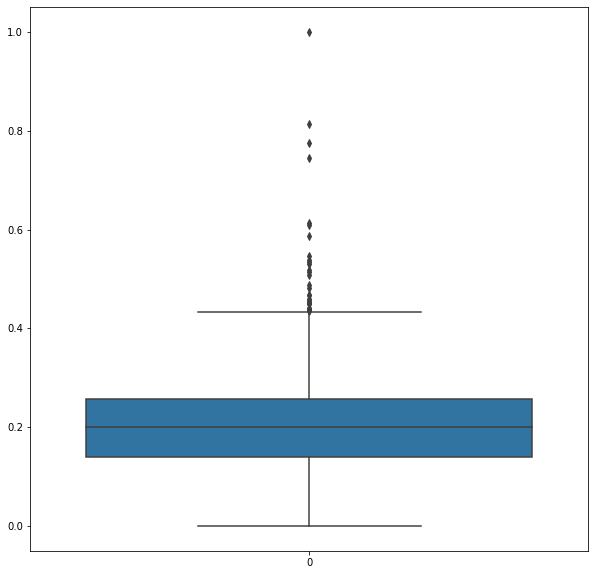

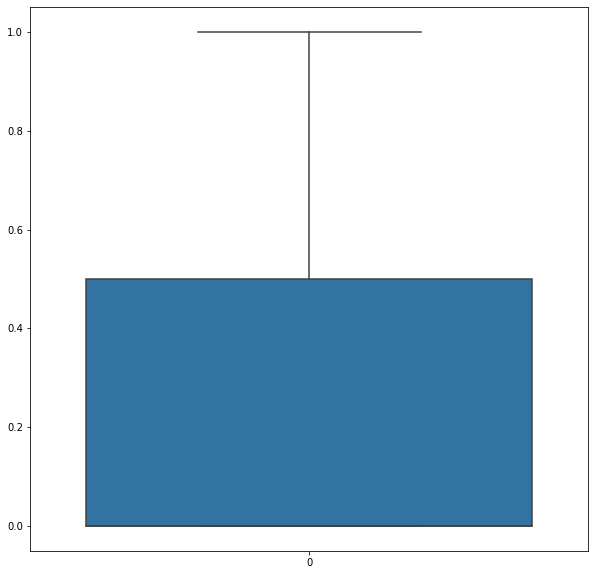

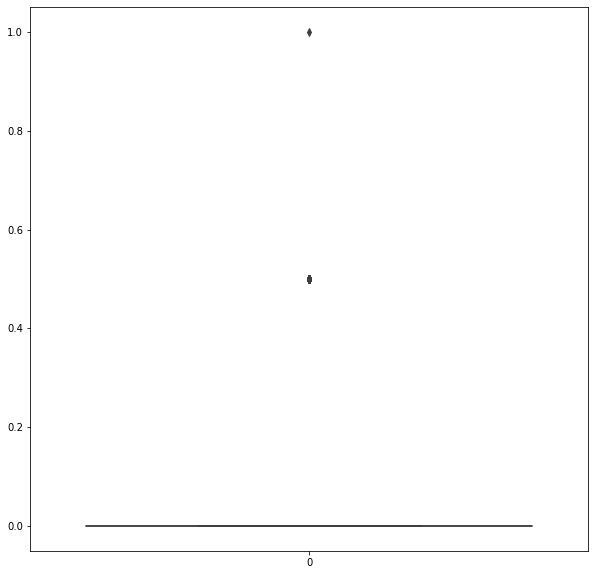

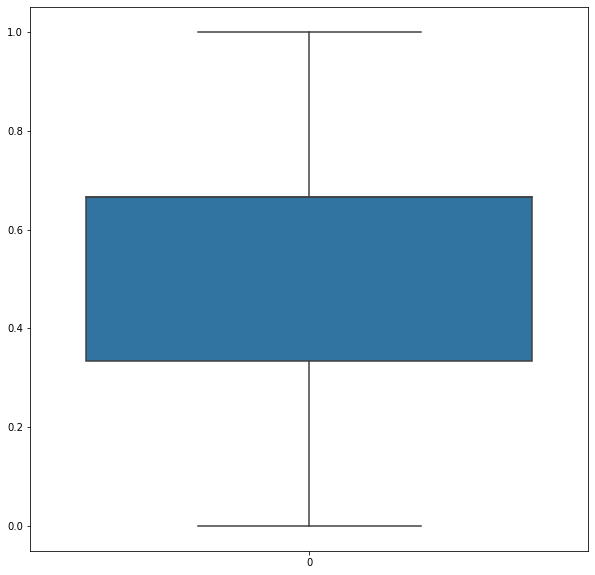

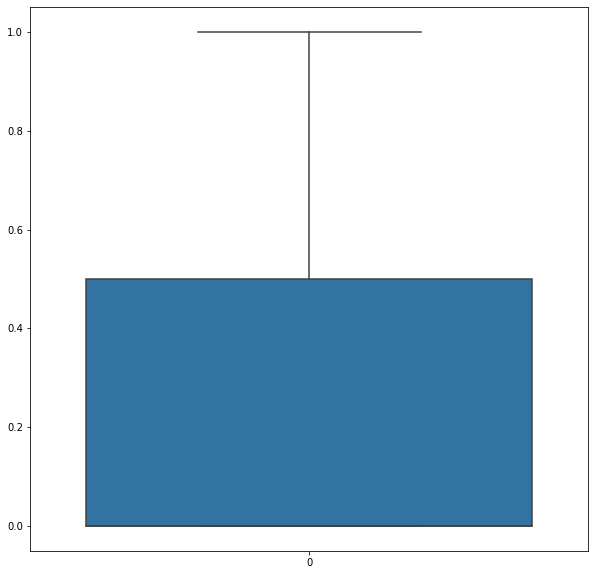

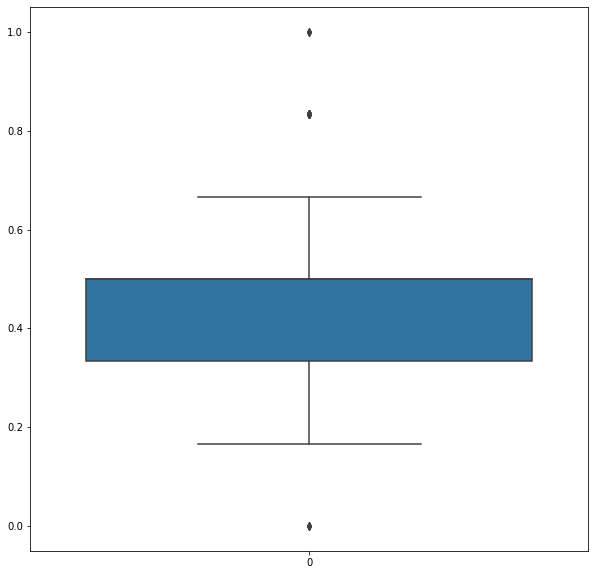

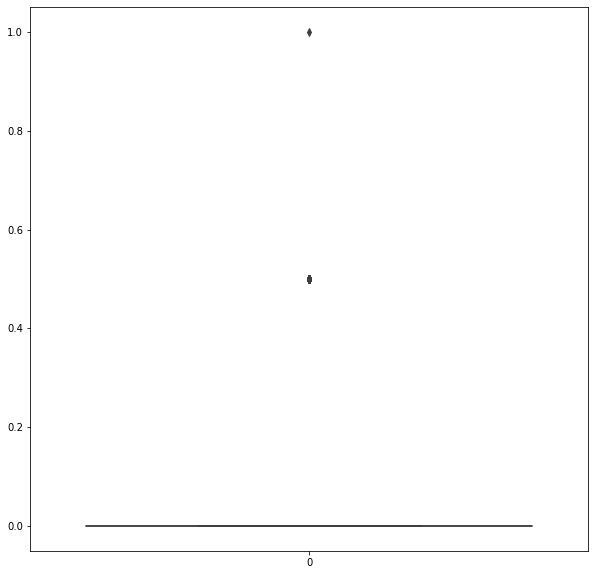

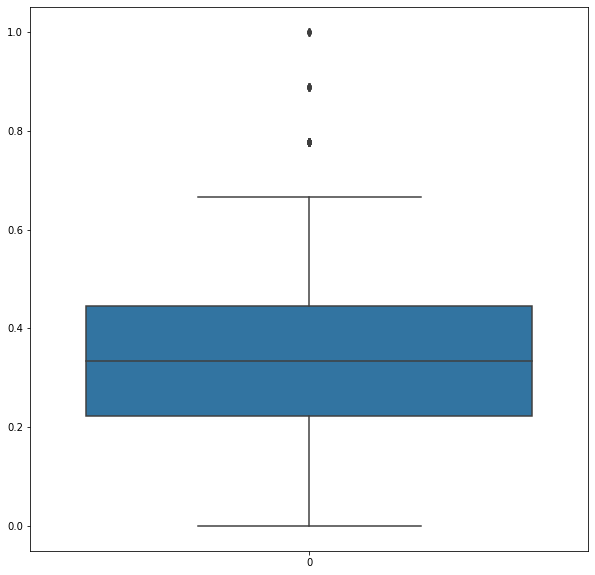

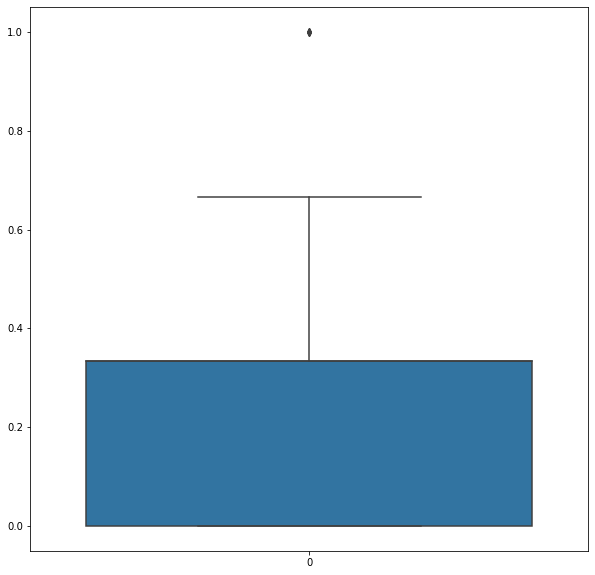

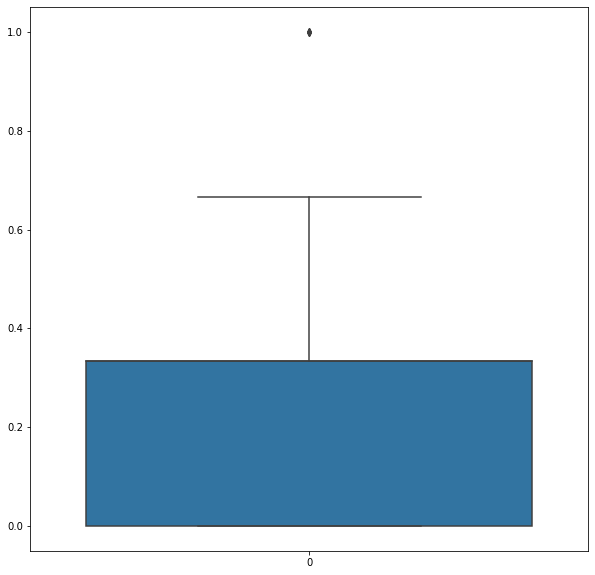

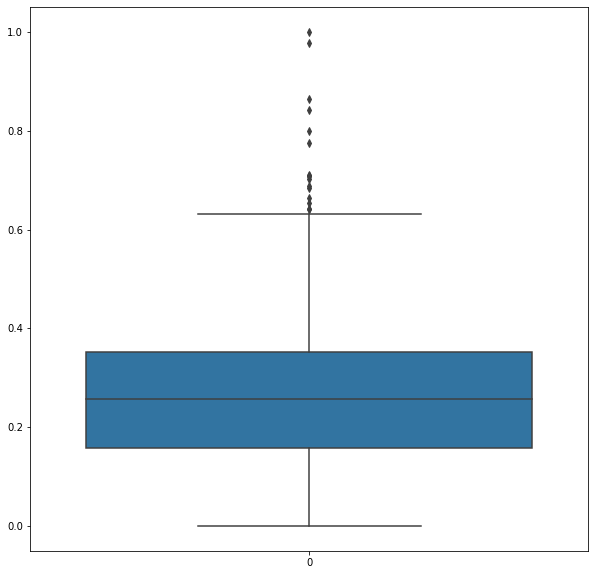

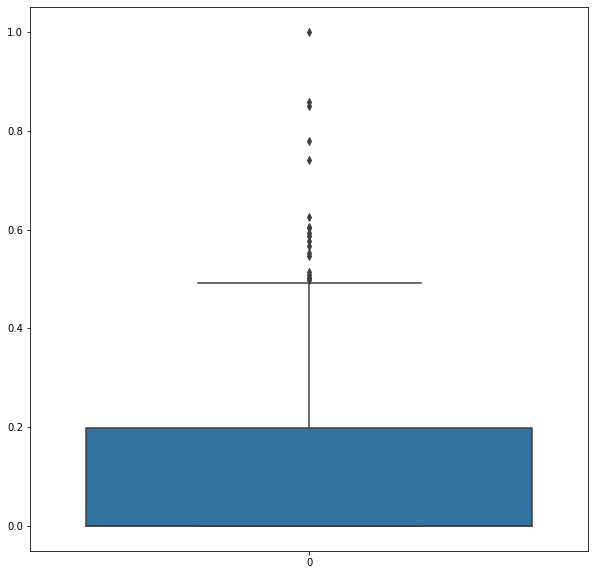

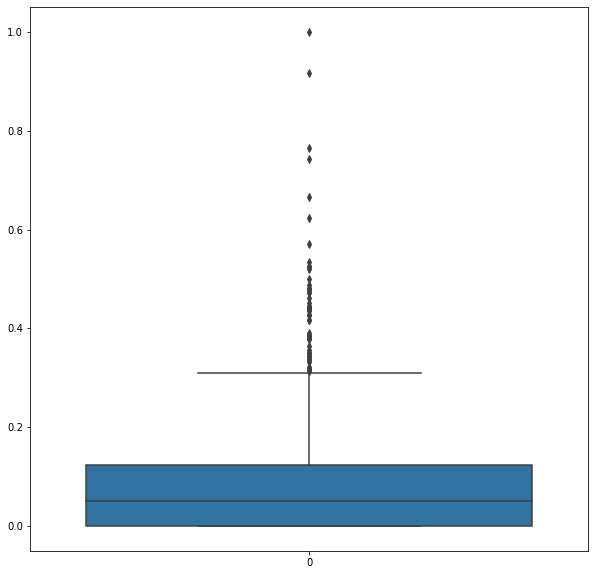

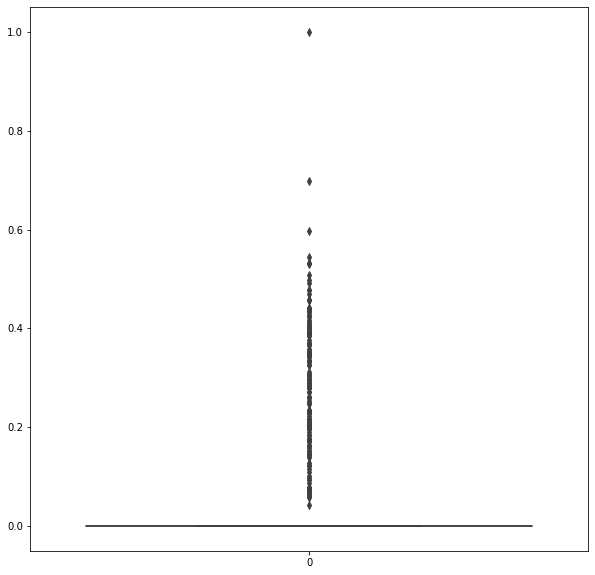

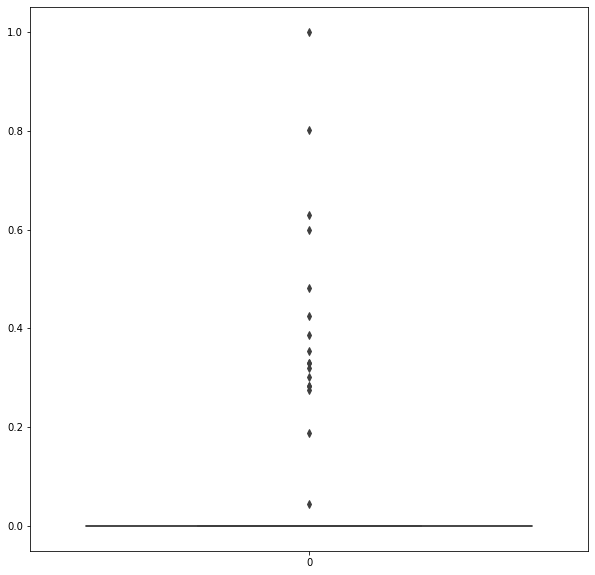

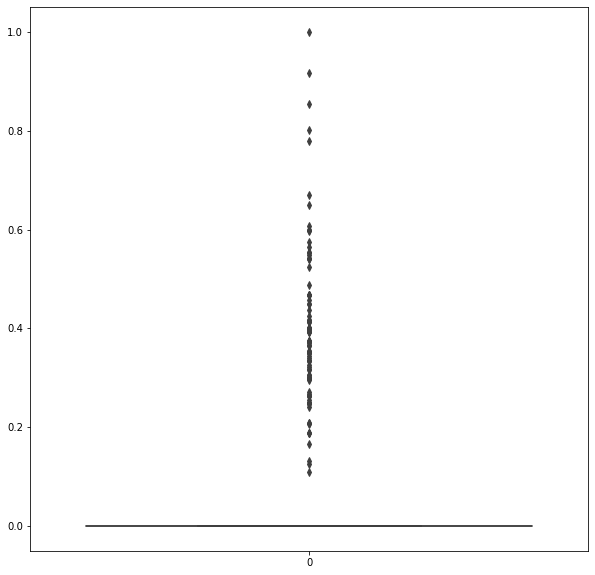

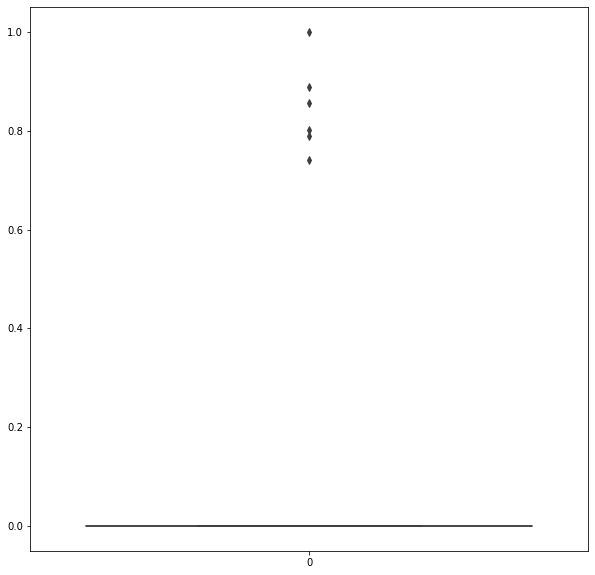

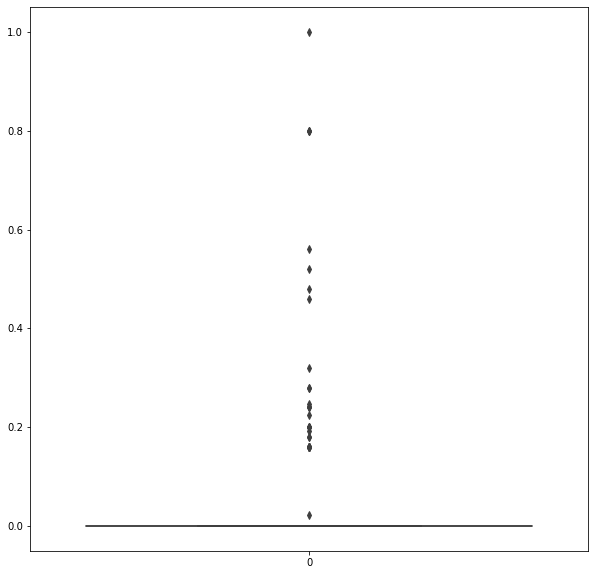

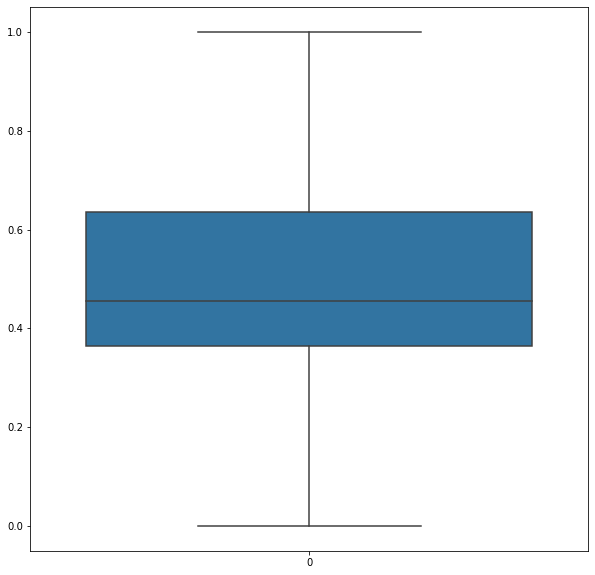

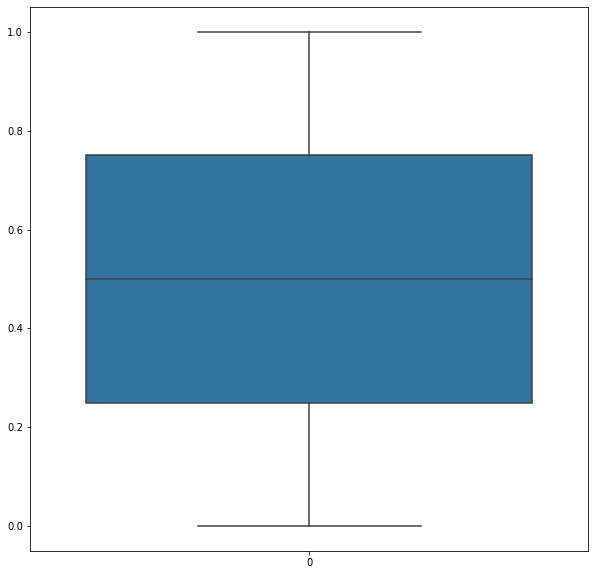

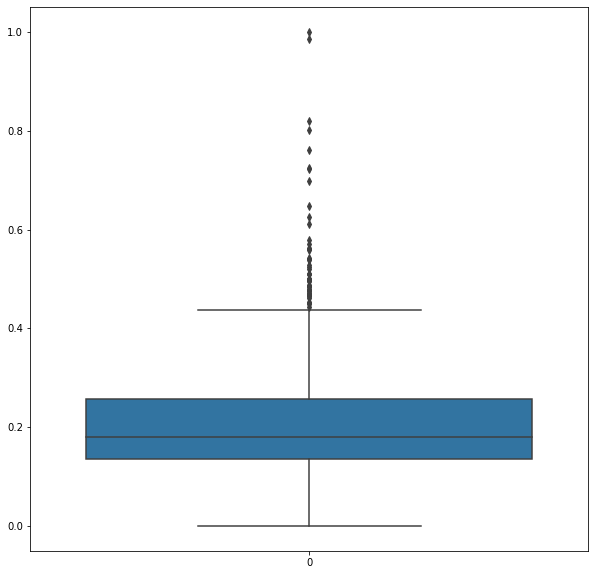

In [75]:
# Checking for potential outliers in the  columns by plotting boxplot
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show() 

In [76]:
# As SalePrice is the target variable, therefore it has to be removed from the num_cols 
num_cols.remove('SalePrice')

## Removing Outliers

In [77]:
# Creating a function based on the Inter Quantile Range to remove the outliers outside this range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [78]:
# Converting all the values greater than Inter Quantile Range to the Upper Limit and values lower than IQR to Lower Limit 
for column in num_cols:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

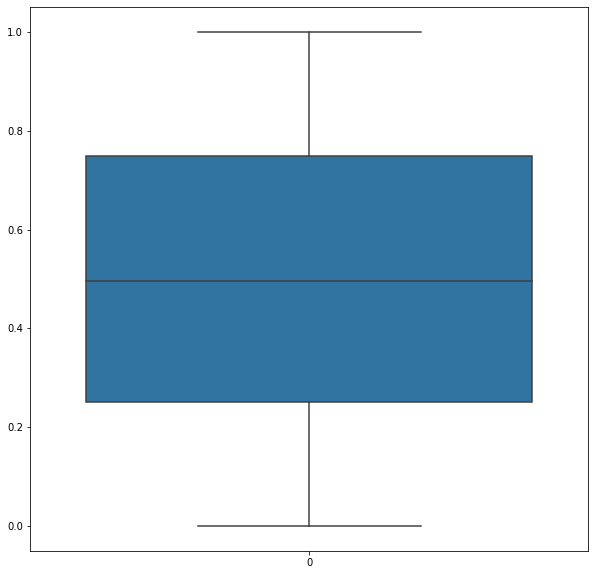

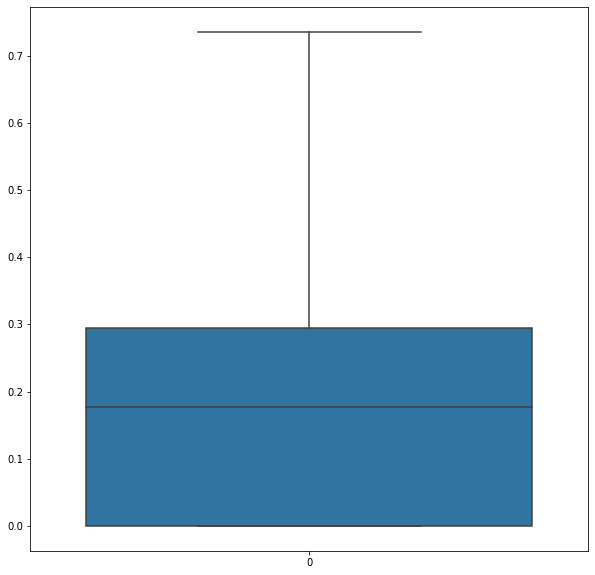

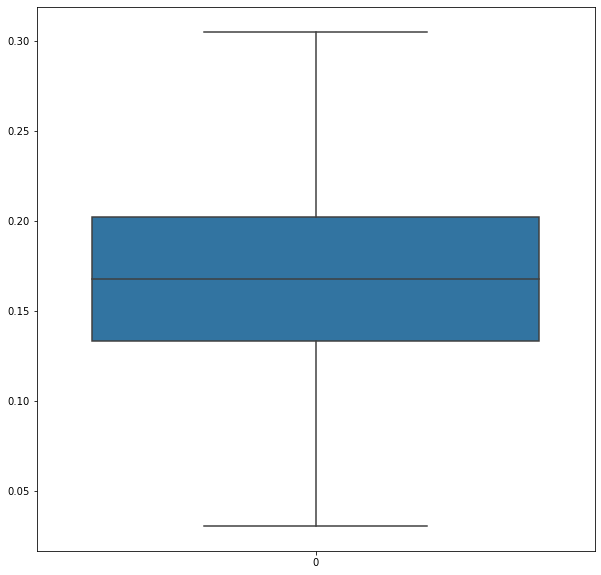

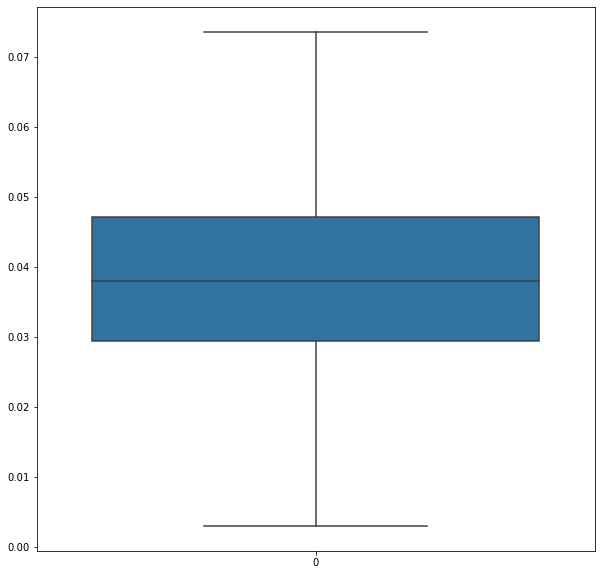

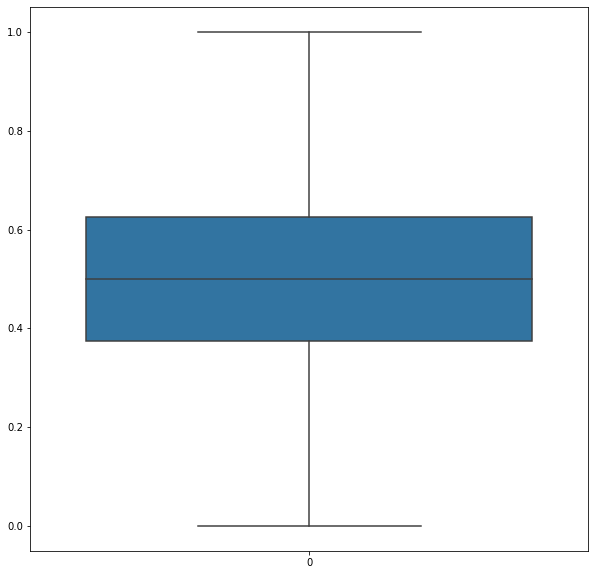

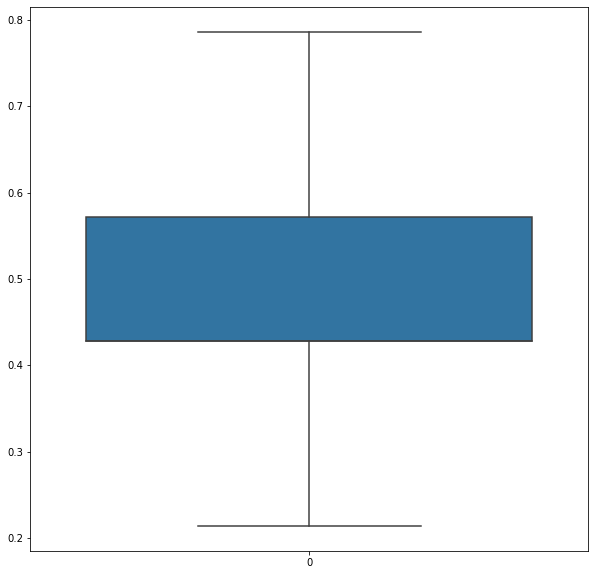

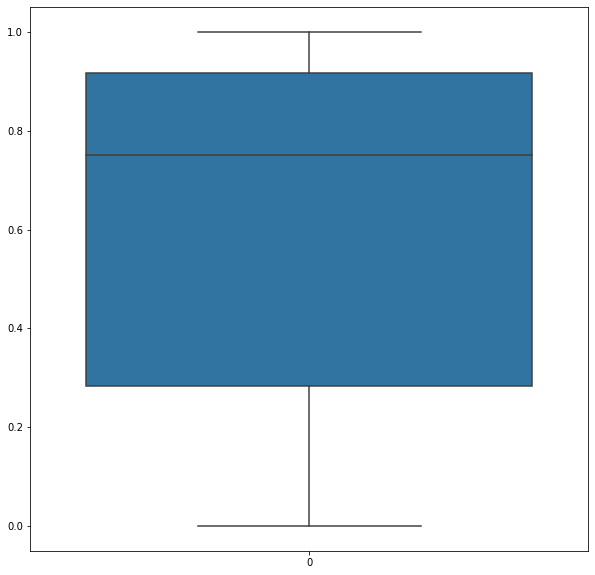

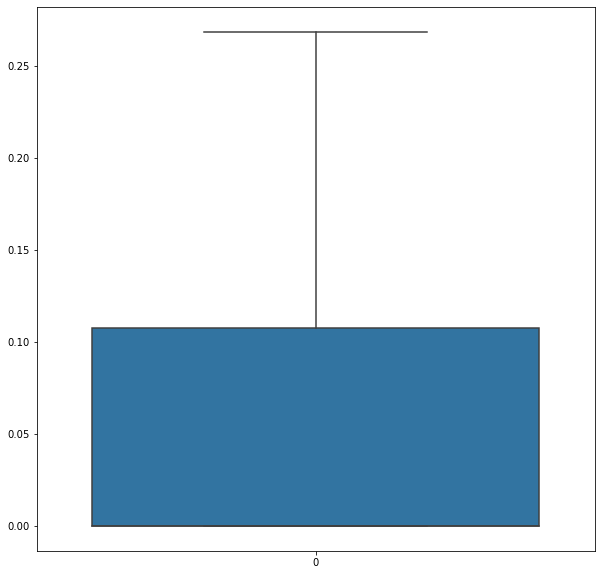

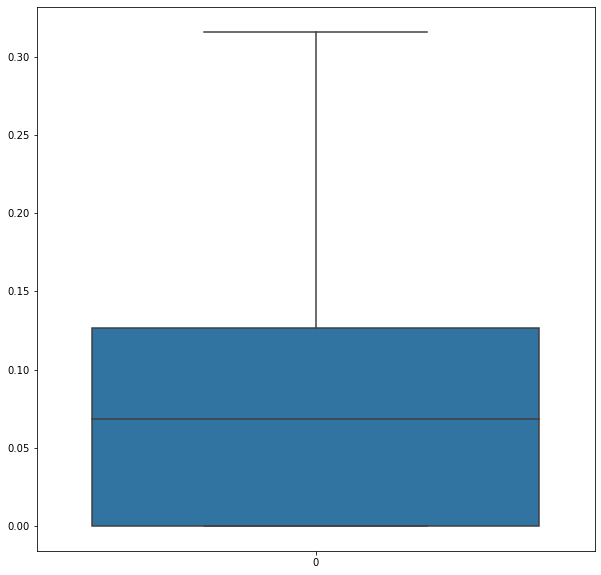

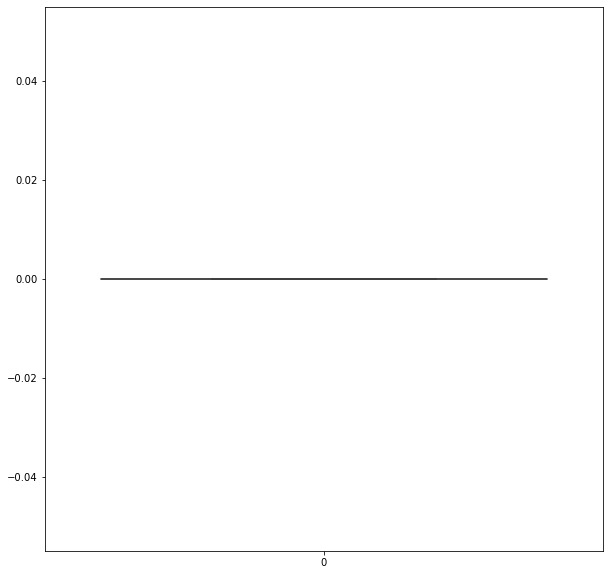

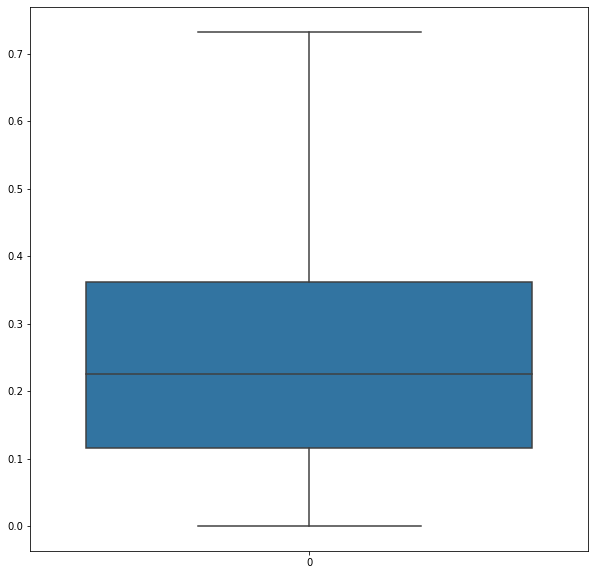

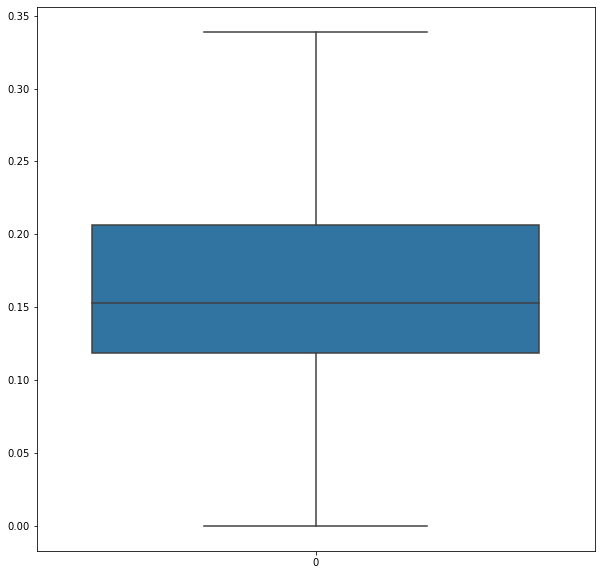

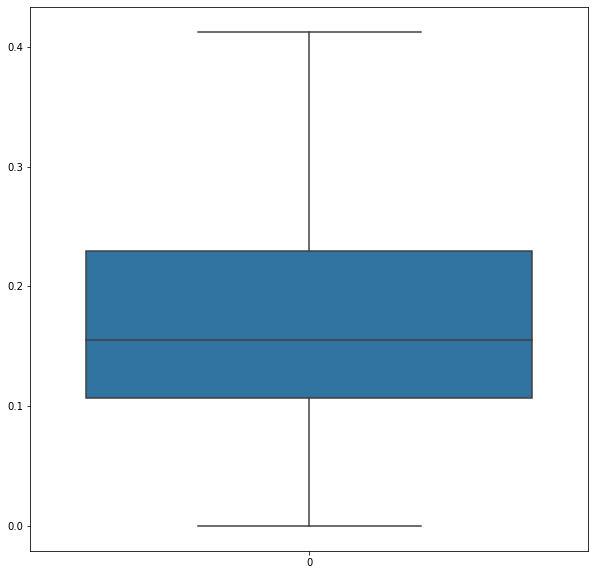

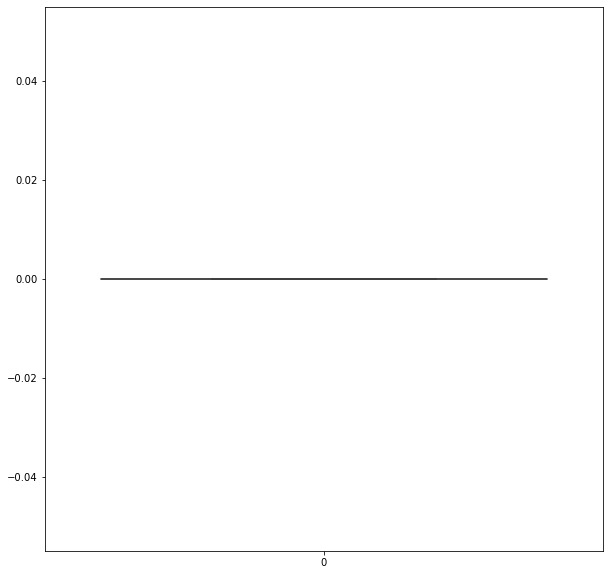

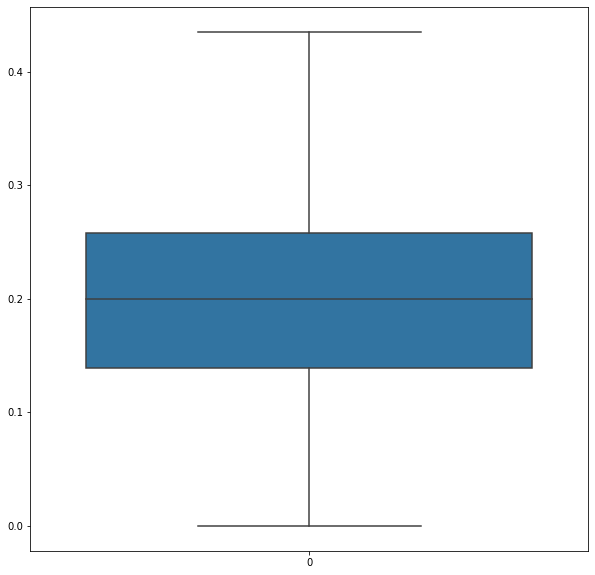

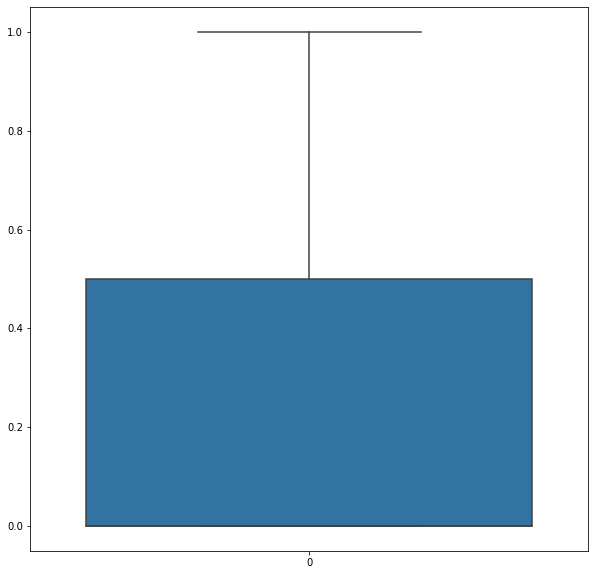

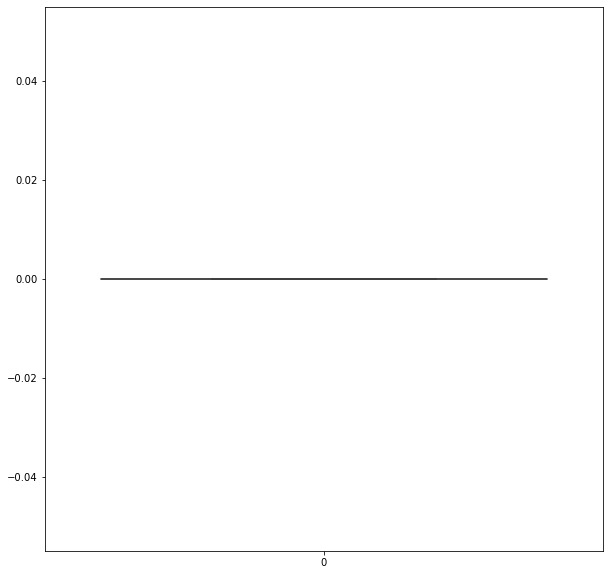

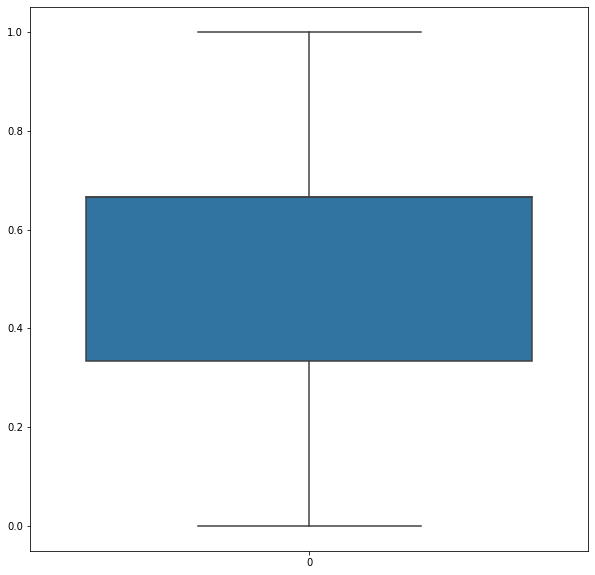

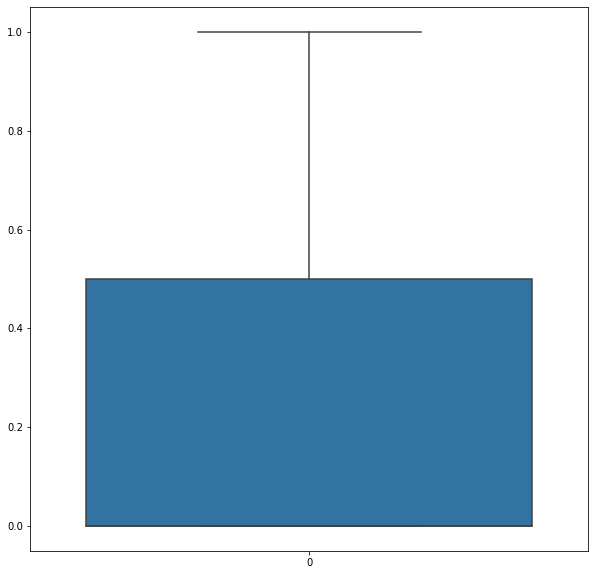

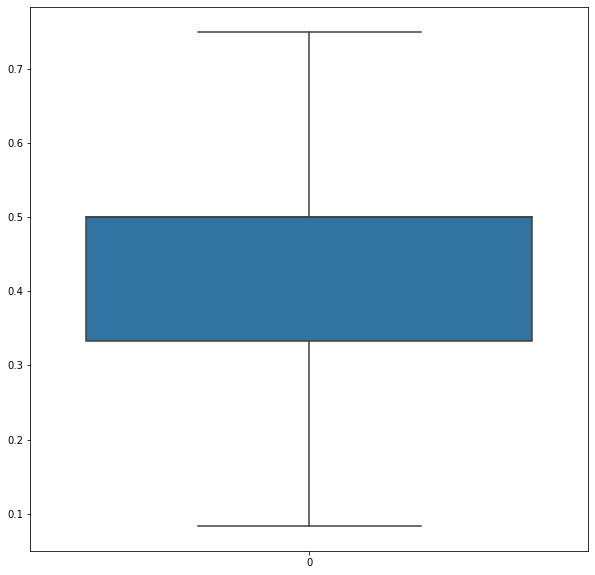

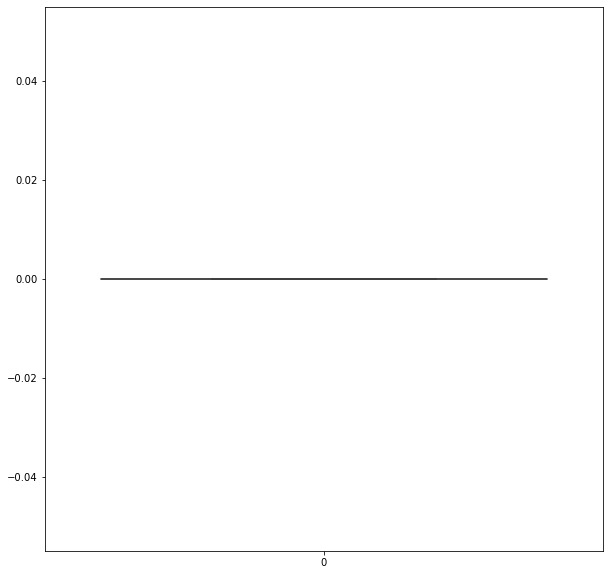

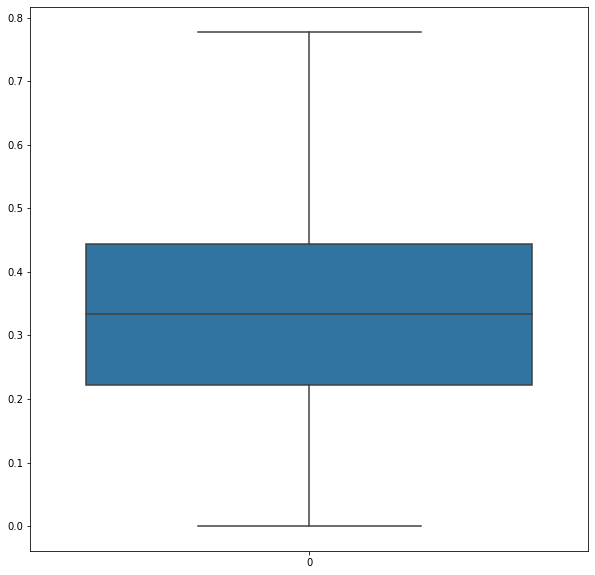

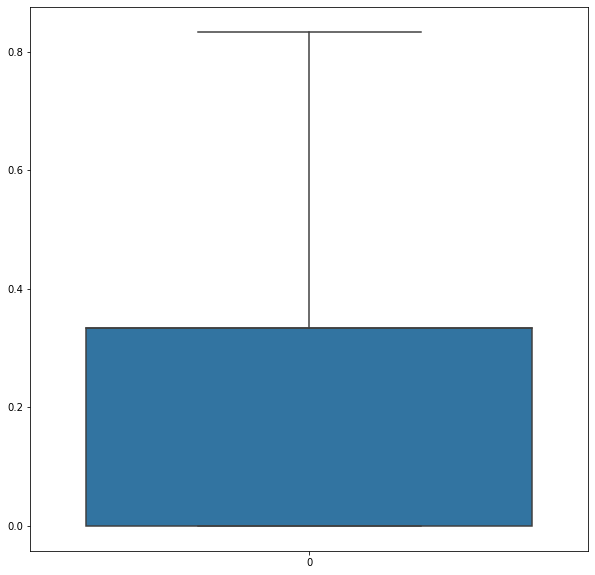

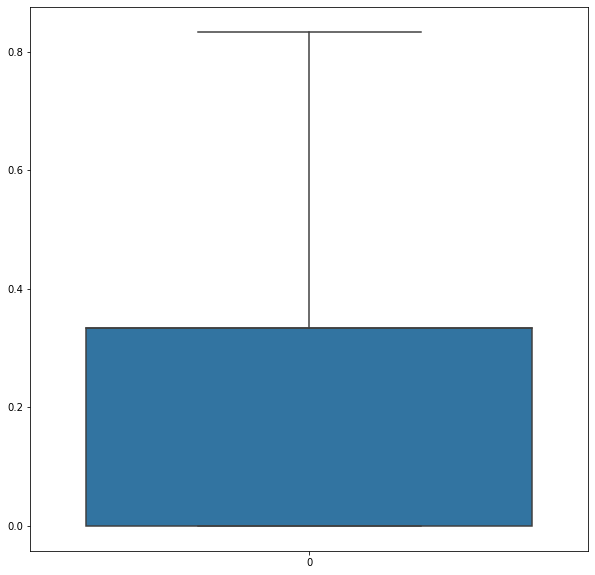

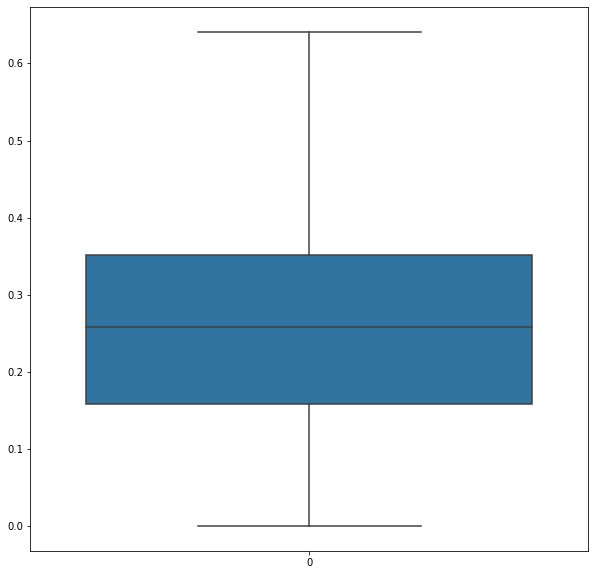

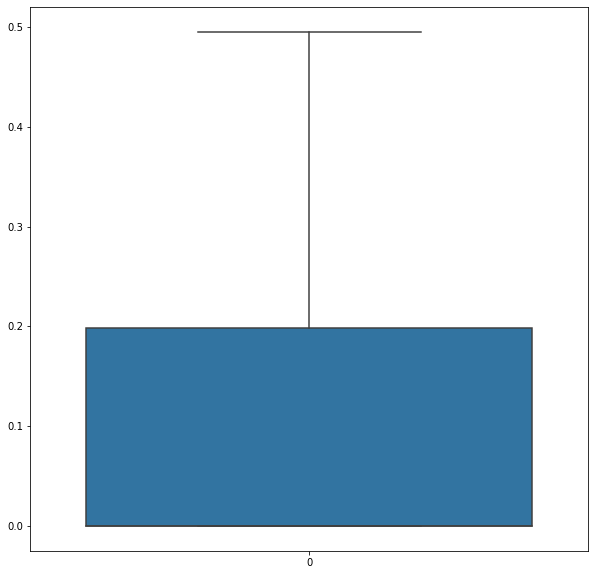

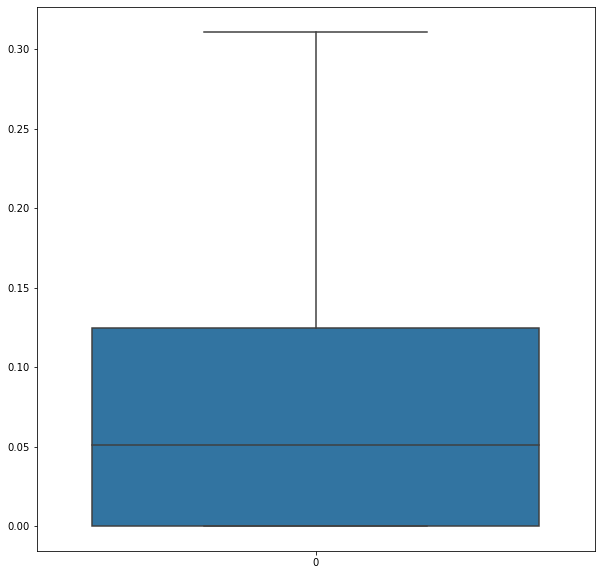

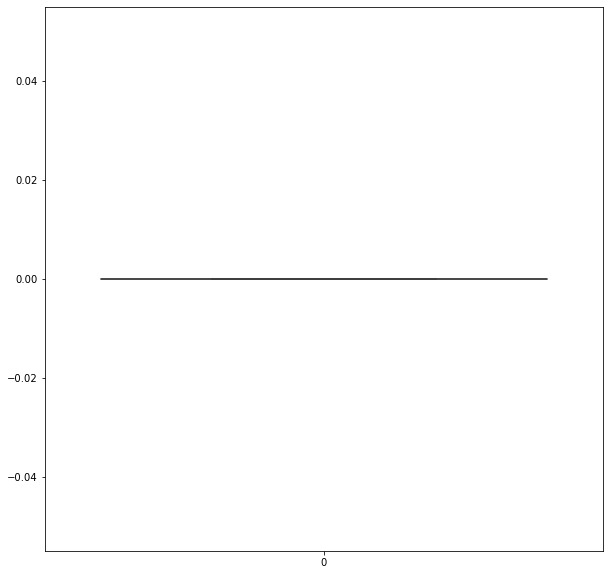

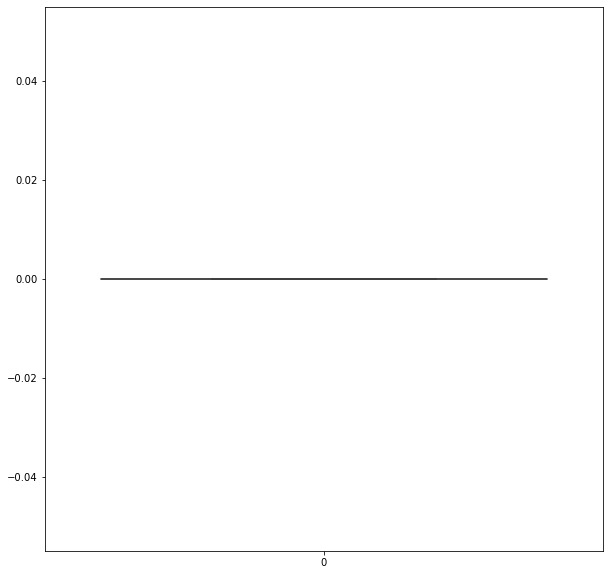

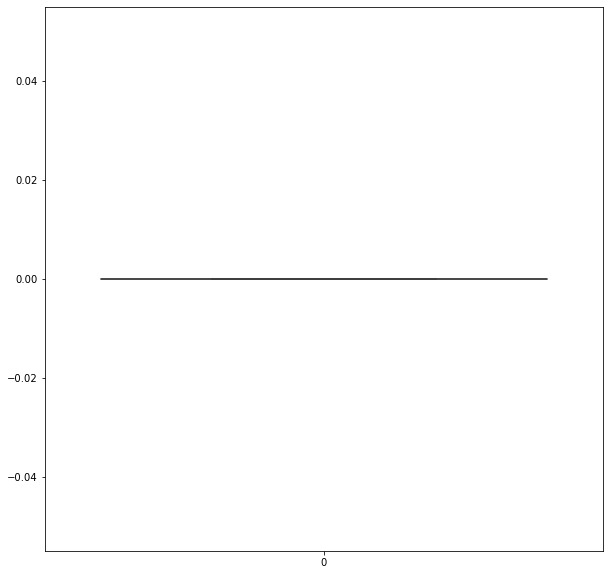

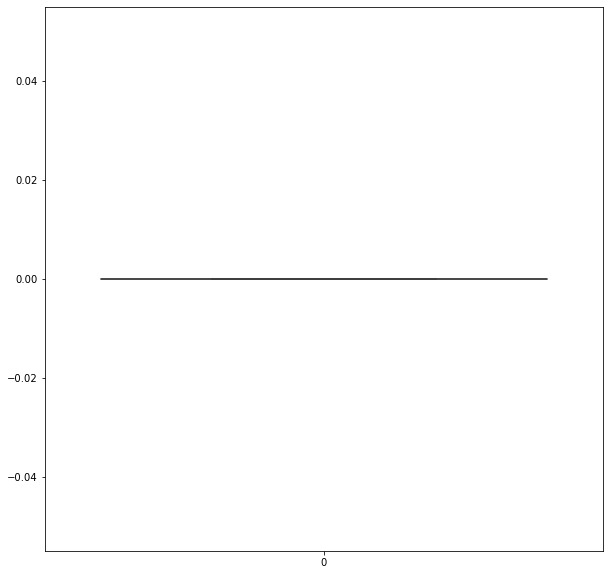

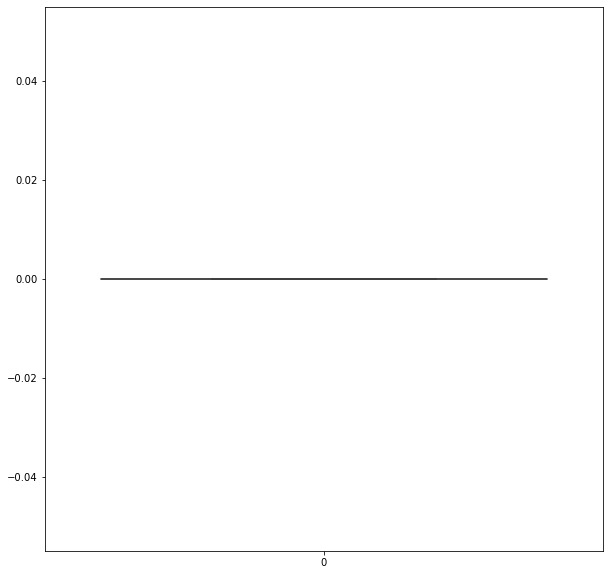

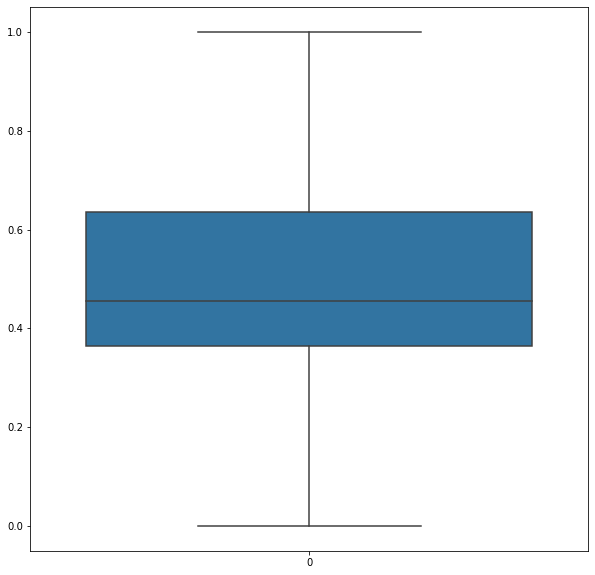

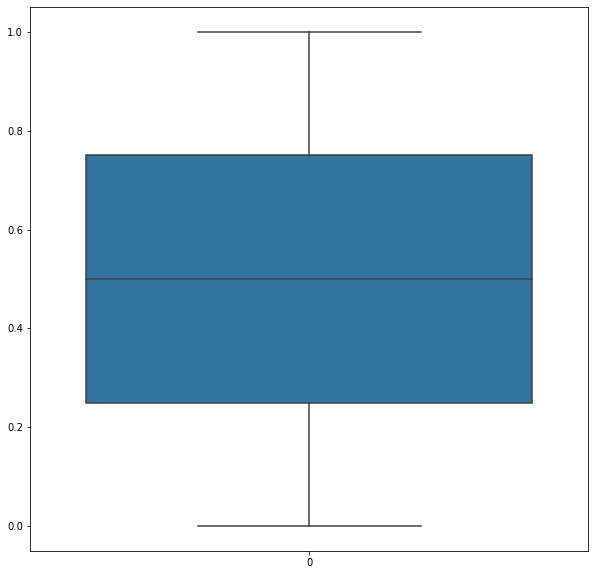

In [79]:
# Creating boxplots to check the numerical columns after updating the columns
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show() 

In [80]:
# Dropping ID column as it will not be used as an independent variable 
df.drop('Id',axis = 1,inplace = True)

In [81]:
# Creating a DataFrame X containing all the independent variables 
X = df.drop('SalePrice', axis=1)

# Creating a DataFrame y having the target variable
y = df[['SalePrice']]

# 4.Model building and evaluation 

### Splitting the data into training and testing set

In [82]:
# Splitting the data into training and testing data in the ratio of 70:30 respectively 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [83]:
# Importing useful libraries for application of various models 
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

In [84]:
# invoking the LinearRegression function and finding the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for MSSubClass is -0.022717196403052687
The coefficient for LotFrontage is 0.0323325342702718
The coefficient for LotArea is 0.5699703636973708
The coefficient for OverallQual is 0.11052592965235482
The coefficient for OverallCond is 0.05515902242876203
The coefficient for YearRemodAdd is 0.01629297977348693
The coefficient for MasVnrArea is -0.005360829994055363
The coefficient for BsmtFinSF1 is 0.23088431240341997
The coefficient for BsmtFinSF2 is 80992924089.99634
The coefficient for BsmtUnfSF is 0.02017664909362793
The coefficient for TotalBsmtSF is 0.16637861728668213
The coefficient for 1stFlrSF is 0.16928863525390625
The coefficient for LowQualFinSF is 142646698673.614
The coefficient for GrLivArea is 0.0959467887878418
The coefficient for BsmtFullBath is 0.0023365020751953125
The coefficient for BsmtHalfBath is 120036949804.99239
The coefficient for FullBath is 0.05888938903808594
The coefficient for HalfBath is 0.018374204635620117
The coefficient for BedroomAb

In [86]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.6733184305438179


In [87]:
# R square on training data
regression_model.score(X_train, y_train)

0.9254378454752615

In [88]:
# R square on testing data
regression_model.score(X_test, y_test)

-2.8302361157923828e+19

In [89]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

In [91]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [92]:
# Plotting the summary table of the first fitted model 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     35.72
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          7.34e-231
Time:                        23:24:28   Log-Likelihood:                 1561.5
No. Observations:                 765   AIC:                            -2727.
Df Residuals:                     567   BIC:                            -1808.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.67

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Creating a DataFrame displaying VIF of all the features 
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[0:50]

,Features,VIF
94,HouseStyle_2.5Fin,inf
63,Neighborhood_NPkVill,inf
200,GarageCond_TA,inf
199,GarageCond_Po,inf
198,GarageCond_Gd,inf
197,GarageCond_Fa,inf
196,GarageQual_TA,inf
195,GarageQual_Po,inf
194,GarageQual_Gd,inf
193,GarageQual_Fa,inf


In [95]:
# Since VIF of all the columns are very large, this shows signs of high multicollinearity amongst themselves. Hence we need
# to reiterate and calculate the VIF scores.

In [96]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [97]:
# Creating a DataFrame having Vif scores of all the columns which were greater than 60
drop_coll=vif[vif['VIF']>60]

In [98]:
drop_coll

,Features,VIF
94,HouseStyle_2.5Fin,inf
63,Neighborhood_NPkVill,inf
200,GarageCond_TA,inf
199,GarageCond_Po,inf
198,GarageCond_Gd,inf
197,GarageCond_Fa,inf
196,GarageQual_TA,inf
195,GarageQual_Po,inf
194,GarageQual_Gd,inf
193,GarageQual_Fa,inf


In [99]:
# Creating another fitted model by dropping all the features having VIF score greater than 60
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop(columns=drop_coll['Features'],axis = 1,inplace = True)
# Creating another fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [100]:
vif2 = pd.DataFrame()
vif2['Features'] = X_train_lm.columns
vif2['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif2['VIF'] = round(vif['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2[0:50]

,Features,VIF
63,Neighborhood_OldTown,inf
123,ExterQual_TA,inf
94,RoofStyle_Gambrel,inf
176,SaleType_ConLI,inf
109,Exterior1st_WdShing,inf
151,HeatingQC_Gd,inf
0,MSSubClass,7704.50
99,RoofMatl_Tar&Grv,244.12
101,RoofMatl_WdShngl,229.96
119,Exterior2nd_Wd Sdng,149.58


In [101]:
# Since VIF of all the columns are again very large. Hence we need to reiterate and again calculate the VIF scores

In [102]:
drop_coll1=vif2[vif2['VIF']>60]

In [103]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [104]:
# # Again dropping the columns having VIF scores greater than 60 adn creating another fitted model
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop(columns=drop_coll1['Features'],axis = 1,inplace = True)
# Creating another fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [105]:
vif3 = pd.DataFrame()
vif3['Features'] = X_train_lm.columns
vif3['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3[0:50]

,Features,VIF
157,Electrical_Mix,inf
156,Electrical_FuseP,inf
104,Exterior1st_CBlock,inf
117,Exterior2nd_CBlock,inf
136,BsmtCond_Po,inf
149,Heating_Grav,inf
176,GarageQual_Po,inf
0,const,7402.58
129,ExterCond_TA,102.48
167,GarageType_Attchd,98.13


In [106]:
# Again the VIF scores of many columns are way too large, therefore we need to reiterate again

In [107]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [108]:
# Creating a DatafFrame contaning all the features along with VIF scores which are greater than 20 so that we can drop them after 
drop_coll2=vif3[vif3['VIF']>20]

In [109]:
# Dropping all the features having VIF scores greater than 20 and creating another fitted model 
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop(columns=drop_coll2['Features'],axis = 1,inplace = True)
# Creating another fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [110]:
vif4 = pd.DataFrame()
vif4['Features'] = X_train_lm.columns
vif4['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4[0:50]

,Features,VIF
91,RoofMatl_CompShg,965.95
29,Street_Pave,899.62
161,Functional_Typ,145.36
144,BsmtFinType2_Unf,114.87
0,MSSubClass,84.01
13,BedroomAbvGr,55.59
151,CentralAir_Y,55.30
3,OverallQual,54.14
121,ExterQual_TA,51.65
131,BsmtCond_TA,49.78


In [111]:
# This iteration also fails as new featues appear having bery larger VIF scores, Therefore Reiterating again

In [112]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [113]:
# Creating a DatafFrame contaning all the features along with VIF scores which are greater than 15 so that we can drop them after 
drop_coll3=vif4[vif4['VIF']>15]

In [114]:
# Dropping all the features having VIF scores greater than 15 and creating another fitted model 
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop(columns=drop_coll3['Features'],axis = 1,inplace = True)
# Creating another fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [115]:
vif5 = pd.DataFrame()
vif5['Features'] = X_train_lm.columns
vif5['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif5['VIF'] = round(vif5['VIF'], 2)
vif5 = vif5.sort_values(by = "VIF", ascending = False)
vif5[0:50]

,Features,VIF
93,Exterior1st_CBlock,inf
146,Electrical_Mix,inf
84,RoofStyle_Hip,inf
85,RoofStyle_Mansard,inf
88,RoofMatl_Tar&Grv,inf
104,Exterior2nd_CBlock,inf
124,BsmtCond_Po,inf
138,Heating_Grav,inf
82,RoofStyle_Gable,inf
145,Electrical_FuseP,inf


## INFERENCES:
### 1.The R square on the testing data was very high in negative indicating either  the model was overfitting or the model selection was wrong which lead to poor performance of the model.
### 2. Therefore, to be sure several iterations were performed and columns were dropped based on their VIF scores.
### 3. But the issue was, everytime the new iteration was performed new features came out having high VIF scores.
### 4. Therefore this showed that this was not the right model selection.

# Ridge Regularisation

In [116]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [118]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-2.54529935e-02  1.43821007e-02  1.07243654e-02  7.71986025e-02
   4.32387940e-02  1.18624260e-02  9.01240222e-03  4.56755535e-02
   0.00000000e+00  4.74286459e-03  4.81974823e-02  6.58735406e-02
   0.00000000e+00  6.87824924e-02  1.50883163e-02  0.00000000e+00
   5.33150744e-02  2.59991939e-02  8.67500870e-03  0.00000000e+00
   6.01129658e-02  3.47107537e-02  4.08862690e-02  2.99791047e-02
   1.67783975e-02  1.24403004e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.87686459e-03
   8.62561846e-04  1.21280911e-02 -2.34939009e-03  1.13939327e-02
   5.82631457e-03  1.36500666e-02  1.69047992e-02 -8.19935436e-03
  -3.79708843e-03  2.27570005e-02  1.03761179e-02  1.75175024e-02
   2.18479907e-02 -1.77421735e-02 -1.54778158e-02 -3.51667888e-03
   5.07137047e-03  6.68172169e-03 -4.28768251e-03  3.69296174e-03
  -1.41023754e-03 -4.05425079e-04 -1.29613833e-02  1.92806040e-02
  -2.98111660e-02 -2.02255796e-02 -1.03096366e-02 -5.65915854e-03
  -1.53111

In [119]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)       #Calculating R2 score for training data
print('R2 Score of Training data: ',round(r2_train_lr,3))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)          #Calculating R2 score for testing data
print('R2 Score of Testing data: ',round(r2_test_lr,3))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))  #Calculating Residual sum of squares of y_train and y_pred_train
print('RSS1: ',round(rss1_lr[0],3))
metric2.append(rss1_lr[0])

rss2_lr = np.sum(np.square(y_test - y_pred_test))    #Calculating Residual sum of squares of y_test and y_pred_test
print('RSS2: ',round(rss2_lr[0],3))
metric2.append(rss2_lr[0])

mse_train_lr = mean_squared_error(y_train, y_pred_train) #Calculating Mean Squared Error of y_train and y_pred_train
print('RMSE1: ',round(mse_train_lr**0.5,3))    #Printing Root Mean Squared Error of y_train and y_pred_train by taking root of MSE
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)  #Calculating Mean Squared Error of y_train and y_pred_train
print('RMSE2: ',round(mse_test_lr**0.5,3))     #Printing Root Mean Squared Error of y_train and y_pred_train by taking root of MSE
metric2.append(mse_test_lr**0.5)

R2 Score of Training data:  0.891
R2 Score of Testing data:  0.861
RSS1:  1.211
RSS2:  0.484
RMSE1:  0.038
RMSE2:  0.042


# Inferences from Ridge Regression:
### 1. R2 Score of Training data:  0.891
### 2. R2 Score of Testing data:  0.861
### 3. RSS1:  1.211
### 4. RSS2:  0.484
### 5. RMSE1:  0.038
### 6. RMSE2:  0.042

# Lasso Regularization

In [120]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, #using the same alpha values of ridge regression to find the best alpha value 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,  #using the same cross validation folds as of ridge regression
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [122]:
#Fitting lasso model for alpha = 0.0001 

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [123]:
# Printing coefficients of the features based on the alpha value
lasso.coef_

array([-2.85316306e-02,  0.00000000e+00,  0.00000000e+00,  1.02107142e-01,
        6.91041860e-02,  6.76250806e-03, -0.00000000e+00,  1.39962295e-01,
        0.00000000e+00, -0.00000000e+00,  8.69182438e-02,  7.60048147e-02,
        0.00000000e+00,  2.63590390e-01,  6.38871871e-03,  0.00000000e+00,
        4.59066604e-02,  2.17543709e-02, -0.00000000e+00,  0.00000000e+00,
        2.74690416e-02,  2.05749283e-02,  3.79994781e-02,  1.67749160e-02,
        6.29694462e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.36872704e-03,
        3.77926527e-04,  3.44712723e-03, -0.00000000e+00,  6.39355844e-03,
        0.00000000e+00,  0.00000000e+00,  1.62521911e-02, -0.00000000e+00,
       -2.68073273e-04,  2.49094348e-02,  0.00000000e+00,  1.66365071e-02,
        1.86411977e-02, -1.12014426e-02, -1.84700674e-02, -4.32914006e-04,
        1.63499292e-03,  0.00000000e+00, -0.00000000e+00,  9.06786010e-04,
        0.00000000e+00, -

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = pd.Series(lasso.predict(X_train))     #Predicting y_train on the basis of X_train
y_pred_test = pd.Series(lasso.predict(X_test))       #Predicting y_test on the basis of X_test

y_pred_train = pd.DataFrame(y_pred_train)       #Creating a DataFrame of y_pred_train with column name as 'SalePrice' 
y_pred_train.columns = ['SalePrice']

y_pred_test = pd.DataFrame(y_pred_test)         #Creating a DataFrame of y_pred_test with column name as 'SalePrice' 
y_pred_test.columns = ['SalePrice']

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)        #Calculating R2 score for training data
print('R2 Score of Training data: ',round(r2_train_lr,3))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)           #Calculating R2 score for Testing data
print('R2 Score of Testing data: ',round(r2_test_lr,3))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))  #Calculating Residual sum of squares of y_train and y_pred_train
print('RSS1: ',round(rss1_lr[0],3))
metric3.append(rss1_lr[0])

rss2_lr = np.sum(np.square(y_test - y_pred_test))    #Calculating Residual sum of squares of y_test and y_pred_test
print('RSS2: ',round(rss2_lr[0],3))
metric3.append(rss2_lr[0])

mse_train_lr = mean_squared_error(y_train, y_pred_train)  #Calculating Mean Squared Error of y_train and y_pred_train
print('RMSE1: ',round(mse_train_lr**0.5,3))  #Calculating Root Mean Squared Error of y_train and y_pred_train by taking root of MSE
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)    #Calculating Mean Squared Error of y_test and y_pred_test
print('RMSE2: ',round(mse_test_lr**0.5,3)) #Calculating Root Mean Squared Error of y_test and y_pred_test by taking root of MSE
metric3.append(mse_test_lr**0.5)

R2 Score of Training data:  0.904
R2 Score of Testing data:  0.871
RSS1:  13.258
RSS2:  1.434
RMSE1:  0.036
RMSE2:  0.04


# Inferences from Lasso Regression:
### 1. R2 Score of Training data:  0.904
### 2. R2 Score of Testing data:  0.871
### 3. RSS1:  13.258
### 4. RSS2:  1.434
### 5. RMSE1:  0.036
### 6. RMSE2:  0.04

## Performance of Ridge & lasso Regularization

In [125]:
# Creating DataFrame containing the performance scores of both the Ridge Regression and the Lasso Regression
Performance_metric = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Ridge Regression': metric2,
        'Lasso Regression': metric3
        }
Performance_metric = pd.DataFrame(Performance_metric)
Performance_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.890899,0.903695
1,R2 Score (Test),0.861207,0.871418
2,RSS (Train),1.210911,13.258080
3,RSS (Test),0.484378,1.434218
4,RMSE (Train),0.038428,0.036104
5,RMSE (Test),0.042045,0.040469


In [126]:
betas = pd.DataFrame(index=X.columns) #Creating a DataFrame with index as the columns of X

In [127]:
betas.reset_index(inplace=True)

In [128]:
ridge_1 =  pd.DataFrame(ridge.coef_) #Creating a DataFrame of coefficients of features as given by ridge regression
lasso_1 =  pd.DataFrame(lasso.coef_) #Creating a DataFrame of coefficients of features as given by lasso regression

In [129]:
ridge_1=ridge_1.T    #Taking transpose of Ridge DataFrame

In [130]:
ridge_1.columns = ['Ridge']  #Adding column name Ridge to the DataFrame ridge above created

In [133]:
lasso_1 = lasso_1.T    #Taking transpose of Lasso DataFrame

In [134]:
lasso_1.columns = ['Lasso']    #Adding column name Lasso to the DataFrame lasso above created

In [135]:
betas.columns = ['Features']   #Adding column name Features to the DataFrame betas above created

In [136]:
final_df = pd.concat([betas,ridge_1,lasso_1],axis = 1)  #concatinating the three dataframes created naming betas,ridge and lasso on columns

## Weights (Coefficients) provided by Ridge & Lasso Regularization

In [137]:
final_df.sort_values(by = 'Lasso',ascending = False)

,Features,Ridge,Lasso
13,GrLivArea,0.068782,0.263590
107,RoofMatl_WdShngl,0.070880,0.170473
7,BsmtFinSF1,0.045676,0.139962
3,OverallQual,0.077199,0.102107
10,TotalBsmtSF,0.048197,0.086918
...,...,...,...
138,ExterQual_TA,-0.036034,-0.032134
177,KitchenQual_Fa,-0.030133,-0.032247
178,KitchenQual_Gd,-0.041863,-0.038331
179,KitchenQual_TA,-0.041245,-0.038516


# Final Conclusion:
## *Both Ridge and Lasso Regression are performing well on our dataset as compared to Linear Regression. But in between these two, Lasso regression seems to be performing slightly better than Ridge regression in terms of R2 score, and RMSE for both training and testing datasets. Therefore, Lasso regression should be selected over Ridge regression for this particular dataset

In [138]:
for i in final_df['Features']:     #Printing all the coefficients of Lasso Regression model along with the feature names
    print('({}) * {} '.format(round(final_df[final_df["Features"]==i].iloc[:,2].values[0],2),i),end='+')

(-0.03) * MSSubClass +(0.0) * LotFrontage +(0.0) * LotArea +(0.1) * OverallQual +(0.07) * OverallCond +(0.01) * YearRemodAdd +(-0.0) * MasVnrArea +(0.14) * BsmtFinSF1 +(0.0) * BsmtFinSF2 +(-0.0) * BsmtUnfSF +(0.09) * TotalBsmtSF +(0.08) * 1stFlrSF +(0.0) * LowQualFinSF +(0.26) * GrLivArea +(0.01) * BsmtFullBath +(0.0) * BsmtHalfBath +(0.05) * FullBath +(0.02) * HalfBath +(-0.0) * BedroomAbvGr +(0.0) * KitchenAbvGr +(0.03) * TotRmsAbvGrd +(0.02) * Fireplaces +(0.04) * GarageCars +(0.02) * GarageArea +(0.01) * WoodDeckSF +(0.0) * OpenPorchSF +(0.0) * EnclosedPorch +(0.0) * 3SsnPorch +(0.0) * ScreenPorch +(0.0) * PoolArea +(0.0) * MiscVal +(-0.01) * MoSold +(0.0) * YrSold +(0.0) * MSZoning_FV +(-0.0) * MSZoning_RH +(0.01) * MSZoning_RL +(0.0) * MSZoning_RM +(0.0) * Street_Pave +(0.02) * LotShape_IR2 +(-0.0) * LotShape_IR3 +(-0.0) * LotShape_Reg +(0.02) * LandContour_HLS +(0.0) * LandContour_Low +(0.02) * LandContour_Lvl +(0.02) * LotConfig_CulDSac +(-0.01) * LotConfig_FR2 +(-0.02) * LotCo

# The Final Equation = 
###  (-0.03) * MSSubClass +(0.0) * LotFrontage +(0.0) * LotArea +(0.1) * OverallQual +(0.07) * OverallCond +(0.01) * YearRemodAdd +(-0.0) * MasVnrArea +(0.14) * BsmtFinSF1 +(0.0) * BsmtFinSF2 +(-0.0) * BsmtUnfSF +(0.09) * TotalBsmtSF +(0.08) * 1stFlrSF +(0.0) * LowQualFinSF +(0.26) * GrLivArea +(0.01) * BsmtFullBath +(0.0) * BsmtHalfBath +(0.05) * FullBath +(0.02) * HalfBath +(-0.0) * BedroomAbvGr +(0.0) * KitchenAbvGr +(0.03) * TotRmsAbvGrd +(0.02) * Fireplaces +(0.04) * GarageCars +(0.02) * GarageArea +(0.01) * WoodDeckSF +(0.0) * OpenPorchSF +(0.0) * EnclosedPorch +(0.0) * 3SsnPorch +(0.0) * ScreenPorch +(0.0) * PoolArea +(0.0) * MiscVal +(-0.01) * MoSold +(0.0) * YrSold +(0.0) * MSZoning_FV +(-0.0) * MSZoning_RH +(0.01) * MSZoning_RL +(0.0) * MSZoning_RM +(0.0) * Street_Pave +(0.02) * LotShape_IR2 +(-0.0) * LotShape_IR3 +(-0.0) * LotShape_Reg +(0.02) * LandContour_HLS +(0.0) * LandContour_Low +(0.02) * LandContour_Lvl +(0.02) * LotConfig_CulDSac +(-0.01) * LotConfig_FR2 +(-0.02) * LotConfig_FR3 +(-0.0) * LotConfig_Inside +(0.0) * LandSlope_Mod +(0.0) * LandSlope_Sev +(-0.0) * Neighborhood_Blueste +(0.0) * Neighborhood_BrDale +(0.0) * Neighborhood_BrkSide +(-0.0) * Neighborhood_ClearCr +(-0.0) * Neighborhood_CollgCr +(0.02) * Neighborhood_Crawfor +(-0.02) * Neighborhood_Edwards +(-0.0) * Neighborhood_Gilbert +(-0.0) * Neighborhood_IDOTRR +(0.0) * Neighborhood_MeadowV +(-0.01) * Neighborhood_Mitchel +(-0.01) * Neighborhood_NAmes +(0.0) * Neighborhood_NPkVill +(-0.02) * Neighborhood_NWAmes +(0.06) * Neighborhood_NoRidge +(0.05) * Neighborhood_NridgHt +(-0.01) * Neighborhood_OldTown +(-0.02) * Neighborhood_SWISU +(-0.0) * Neighborhood_Sawyer +(0.01) * Neighborhood_SawyerW +(0.03) * Neighborhood_Somerst +(0.07) * Neighborhood_StoneBr +(0.0) * Neighborhood_Timber +(0.0) * Neighborhood_Veenker +(-0.0) * Condition1_Feedr +(0.02) * Condition1_Norm +(-0.0) * Condition1_PosA +(-0.0) * Condition1_PosN +(-0.0) * Condition1_RRAe +(0.01) * Condition1_RRAn +(0.0) * Condition1_RRNe +(-0.0) * Condition1_RRNn +(-0.0) * Condition2_Feedr +(-0.0) * Condition2_Norm +(0.0) * Condition2_PosA +(-0.13) * Condition2_PosN +(0.0) * Condition2_RRNn +(0.0) * BldgType_2fmCon +(-0.03) * BldgType_Duplex +(-0.01) * BldgType_Twnhs +(-0.01) * BldgType_TwnhsE +(-0.0) * HouseStyle_1.5Unf +(0.0) * HouseStyle_1Story +(0.0) * HouseStyle_2.5Fin +(-0.0) * HouseStyle_2.5Unf +(0.0) * HouseStyle_2Story +(0.0) * HouseStyle_SFoyer +(-0.0) * HouseStyle_SLvl +(-0.0) * RoofStyle_Gable +(0.0) * RoofStyle_Gambrel +(-0.0) * RoofStyle_Hip +(0.01) * RoofStyle_Mansard +(0.04) * RoofMatl_CompShg +(0.0) * RoofMatl_Membran +(0.0) * RoofMatl_Roll +(0.0) * RoofMatl_Tar&Grv +(0.0) * RoofMatl_WdShake +(0.17) * RoofMatl_WdShngl +(-0.0) * Exterior1st_BrkComm +(0.02) * Exterior1st_BrkFace +(-0.0) * Exterior1st_CBlock +(0.01) * Exterior1st_CemntBd +(-0.0) * Exterior1st_HdBoard +(-0.0) * Exterior1st_ImStucc +(0.01) * Exterior1st_MetalSd +(-0.01) * Exterior1st_Plywood +(0.0) * Exterior1st_Stone +(-0.0) * Exterior1st_Stucco +(0.0) * Exterior1st_VinylSd +(0.01) * Exterior1st_Wd Sdng +(-0.0) * Exterior1st_WdShing +(-0.0) * Exterior2nd_AsphShn +(-0.0) * Exterior2nd_Brk Cmn +(-0.0) * Exterior2nd_BrkFace +(-0.0) * Exterior2nd_CBlock +(0.0) * Exterior2nd_CmentBd +(0.0) * Exterior2nd_HdBoard +(0.04) * Exterior2nd_ImStucc +(0.0) * Exterior2nd_MetalSd +(0.0) * Exterior2nd_Other +(-0.0) * Exterior2nd_Plywood +(-0.0) * Exterior2nd_Stone +(-0.02) * Exterior2nd_Stucco +(0.01) * Exterior2nd_VinylSd +(0.0) * Exterior2nd_Wd Sdng +(-0.0) * Exterior2nd_Wd Shng +(-0.01) * ExterQual_Fa +(-0.03) * ExterQual_Gd +(-0.03) * ExterQual_TA +(0.0) * ExterCond_Fa +(-0.01) * ExterCond_Gd +(0.0) * ExterCond_TA +(0.0) * Foundation_CBlock +(0.0) * Foundation_PConc +(0.0) * Foundation_Stone +(0.0) * Foundation_Wood +(-0.01) * BsmtQual_Fa +(-0.02) * BsmtQual_Gd +(-0.02) * BsmtQual_TA +(0.0) * BsmtCond_Gd +(-0.0) * BsmtCond_Po +(-0.0) * BsmtCond_TA +(0.02) * BsmtExposure_Gd +(-0.0) * BsmtExposure_Mn +(-0.01) * BsmtExposure_No +(0.0) * BsmtFinType1_BLQ +(0.0) * BsmtFinType1_GLQ +(-0.0) * BsmtFinType1_LwQ +(-0.0) * BsmtFinType1_Rec +(-0.0) * BsmtFinType1_Unf +(-0.0) * BsmtFinType2_BLQ +(0.0) * BsmtFinType2_GLQ +(0.0) * BsmtFinType2_LwQ +(-0.0) * BsmtFinType2_Rec +(-0.0) * BsmtFinType2_Unf +(0.02) * Heating_GasW +(0.0) * Heating_Grav +(-0.0) * Heating_OthW +(-0.0) * HeatingQC_Fa +(-0.0) * HeatingQC_Gd +(-0.0) * HeatingQC_Po +(-0.0) * HeatingQC_TA +(0.01) * CentralAir_Y +(0.0) * Electrical_FuseF +(-0.0) * Electrical_FuseP +(-0.0) * Electrical_Mix +(0.0) * Electrical_SBrkr +(-0.03) * KitchenQual_Fa +(-0.04) * KitchenQual_Gd +(-0.04) * KitchenQual_TA +(-0.0) * Functional_Maj2 +(-0.0) * Functional_Min1 +(-0.0) * Functional_Min2 +(0.01) * Functional_Mod +(0.01) * Functional_Typ +(-0.0) * GarageType_Attchd +(0.0) * GarageType_Basment +(0.0) * GarageType_BuiltIn +(0.0) * GarageType_CarPort +(0.0) * GarageType_Detchd +(-0.0) * GarageFinish_RFn +(0.0) * GarageFinish_Unf +(-0.01) * GarageQual_Fa +(0.0) * GarageQual_Gd +(-0.0) * GarageQual_Po +(-0.0) * GarageQual_TA +(-0.0) * GarageCond_Fa +(-0.0) * GarageCond_Gd +(-0.0) * GarageCond_Po +(0.0) * GarageCond_TA +(0.0) * PavedDrive_P +(0.01) * PavedDrive_Y +(-0.0) * SaleType_CWD +(0.0) * SaleType_Con +(0.0) * SaleType_ConLD +(-0.0) * SaleType_ConLI +(-0.0) * SaleType_ConLw +(0.0) * SaleType_New +(0.0) * SaleType_Oth +(-0.0) * SaleType_WD +(0.0) * SaleCondition_AdjLand +(0.0) * SaleCondition_Alloca +(-0.01) * SaleCondition_Family +(0.01) * SaleCondition_Normal +(0.02) * SaleCondition_Partial

# END 